<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TESST_1601-1650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9947]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [9948]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

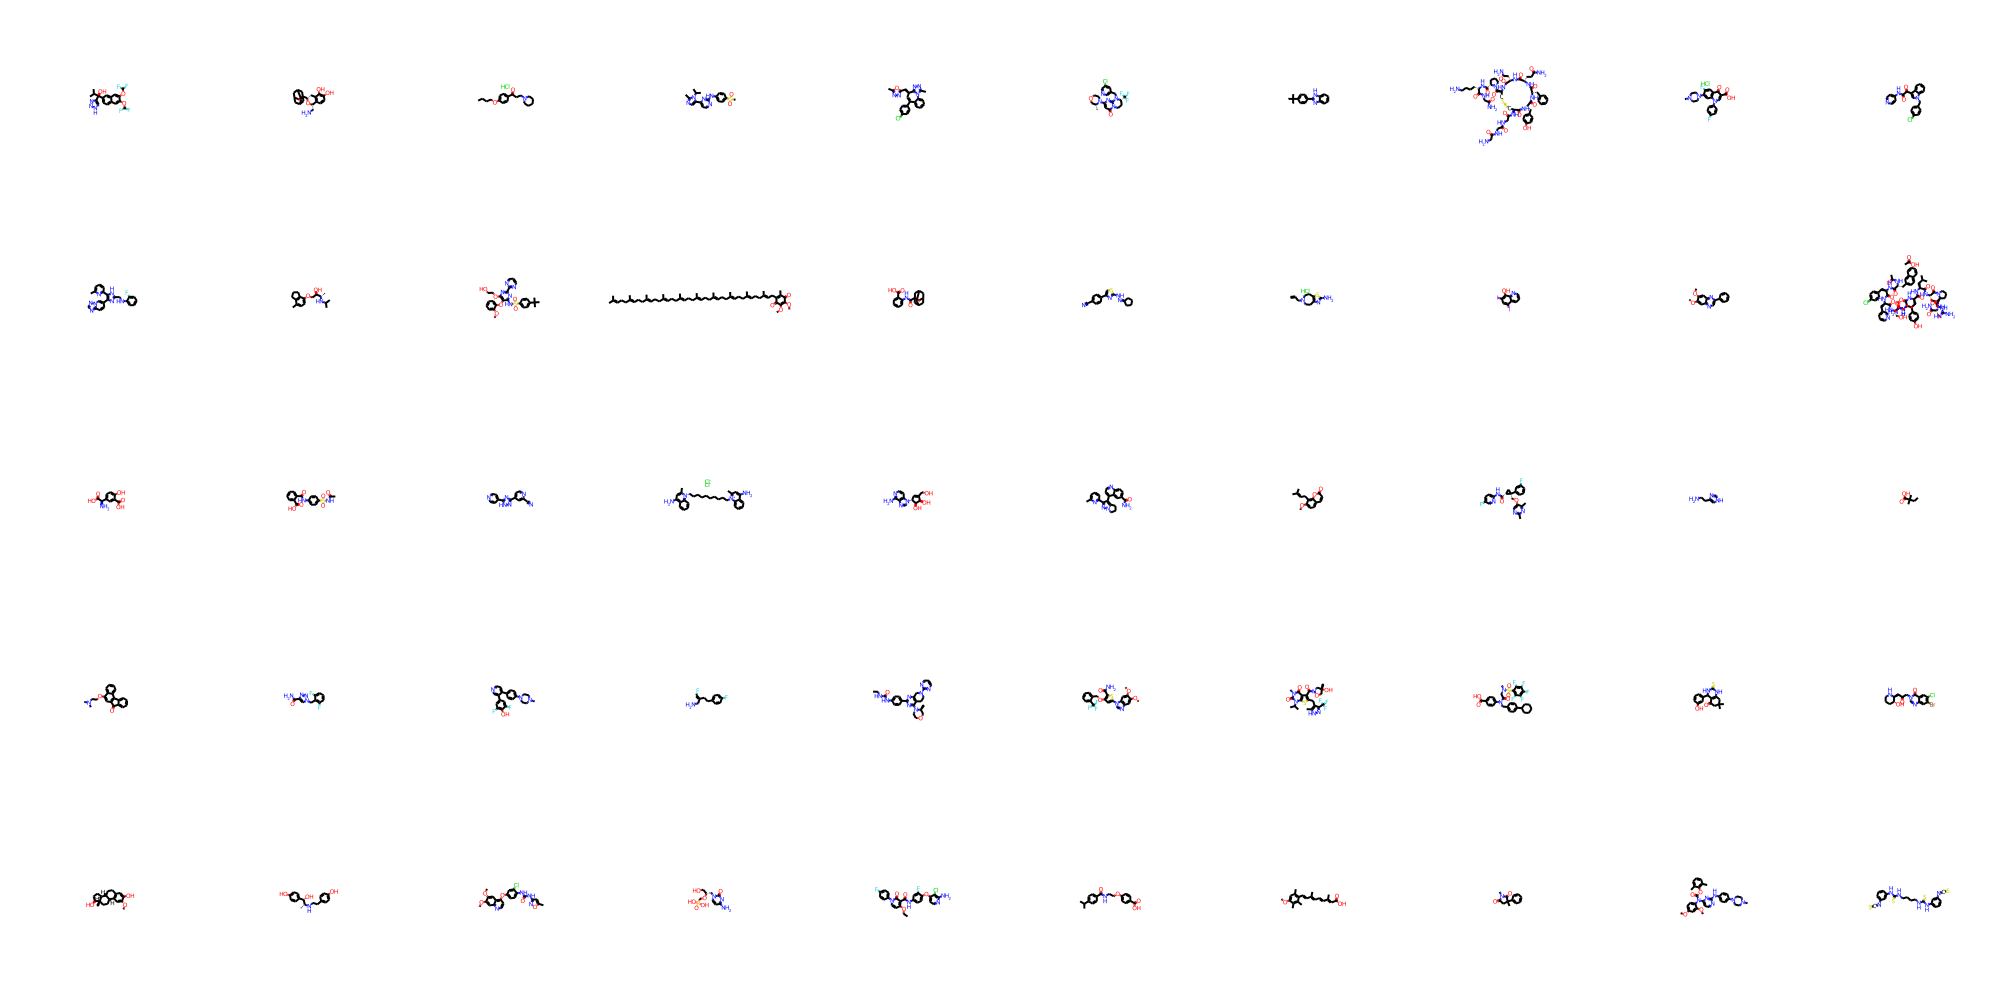

In [9949]:
smiles_list = [

'CC(C)[C@](O)(c1ccc2cc(OC(F)F)c(OC(F)F)cc2c1)c1c[nH]nn1',
'NC[C@@H]1O[C@H](C23CC4CC(CC(C4)C2)C3)Cc2c1ccc(O)c2O',
'CCCCOc1ccc(C(=O)CCN2CCCCC2)cc1.Cl',
'Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C',
'Cc1nnc(C[C@@H]2C=C(c3ccc(Cl)cc3)c3ccccc3-n3c(C)nnc32)o1',
'C[C@@H]1COCCN1c1cc(=O)n2c(n1)N(Cc1cncc(Cl)c1)[C@H](C(F)(F)F)CC2',
'CC(C)(C)c1ccc(-c2nc3ccccc3[nH]2)cc1',
'NCCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1CSSC[C@H](NC(=O)CNC(=O)CNC(=O)CN)C(=O)N[C@@H](Cc2ccc(O)cc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(N)=O)C(=O)N1)C(=O)NCC(N)=O',
'CN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3-c2ccc(F)cc2)CC1.Cl',
'O=C(Nc1ccncc1)C(=O)c1cn(Cc2ccc(Cl)cc2)c2ccccc12',
'Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1',
'Cc1ccc(OC[C@@H](O)[C@H](C)NC(C)C)c2c1CCC2',
'COc1ccccc1Oc1c(NS(=O)(=O)c2ccc(C(C)(C)C)cc2)nc(-c2ncccn2)nc1OCCO',
'COC1=C(OC)C(=O)C(C/C=C(\C)CC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CCC=C(C)C)=C(C)C1=O',
'O=C(O)c1ccccc1NC(=O)C12CC3CC(CC(C3)C1)C2',
'N#Cc1ccc(-c2csc(NN=C3CCCC3)n2)cc1',
'C=CCN1CCc2nc(N)sc2CC1.Cl',
'Oc1c(I)cc(I)c2cccnc12',
'COc1cc2ncc(-c3ccccc3)nc2cc1OC',
'CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N[C@H](Cc1cccnc1)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@H](CCCNC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N1CCC[C@H]1C(=O)N[C@H](C)C(N)=O.CC(=O)O',
'N[C@@H](C(=O)O)c1ccc(O)c(C(=O)O)c1',
'CC(=O)NS(=O)(=O)c1ccc(NC(=O)c2ccccc2C(=O)O)cc1',
'N#Cc1cc(-c2n[nH]c(-c3ccncc3)n2)ccn1',
'Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c2ccccc21.[Cl-].[Cl-]',
'Nc1nccc2c1ncn2[C@@H]1C=C(CO)[C@@H](O)[C@H]1O',
'Cc1cccc(-c2nn3c(c2-c2ccnc4ccc(C(N)=O)cc24)CCC3)n1',
'COc1ccc2ccc(=O)oc2c1CC=C(C)C',
'Cc1ncc(OC[C@@]2(c3cccc(F)c3)C[C@H]2C(=O)Nc2ccc(F)cn2)c(C)n1',
'NCCc1c[nH]cn1',
'CCC(C)(C)C(=O)O',
'CN(C)CCOc1cc2c(c3ccccc13)-c1ccccc1C2=O',
'NC(=O)c1cn(Cc2c(F)cccc2F)nn1',
'CN1CCN(c2ccc(-c3ccncc3-c3cc(F)c(O)c(F)c3)cc2)CC1',
'NC/C(=C/F)CCc1ccc(F)cc1',
'CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN(c2ncccn2)C3)cc1',
'COc1cc2ncn(-c3cc(OCc4ccccc4C(F)(F)F)c(C(N)=O)s3)c2cc1OC',
'Cc1[nH]nc(C(F)(F)F)c1Cc1sc2c(c1C(=O)N1C[C@](C)(O)CO1)c(=O)n(C)c(=O)n2C(C)C',
'CN(CC(=O)N(Cc1ccc(C2CCCCC2)cc1)c1ccc(C(=O)O)cc1)S(=O)(=O)c1c(F)c(F)c(F)c(F)c1F',
'CC1(C)CC(=O)C2=C(C1)NC(=S)NC2c1cccc(O)c1',
'O=C(C[C@@H]1NCCC[C@H]1O)Cn1cnc2cc(Br)c(Cl)cc2c1=O',
'COc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H](O)CC[C@@H]12',
'C[C@@H](NCCc1ccc(O)cc1)[C@@H](O)c1ccc(O)cc1',
'COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c2cc1OC',
'Nc1ccn(C[C@@H](CO)OCP(=O)(O)O)c(=O)n1',
'CCOc1ccn(-c2ccc(F)cc2)c(=O)c1C(=O)Nc1ccc(Oc2ccnc(N)c2Cl)c(F)c1',
'CC(C)c1ccc(C(=O)NCCOc2ccc(C(=O)O)cc2)cc1',
'COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)c(C)c1C',
'CN1C(=O)CC(C)(c2ccccc2)C1=O',
'COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3ccc(N4CCN(C)CC4)cc3)n2)c(OC)c1',
'S=C=Nc1cccc(NC(=S)NCCCCNC(=S)Nc2cccc(N=C=S)c2)c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



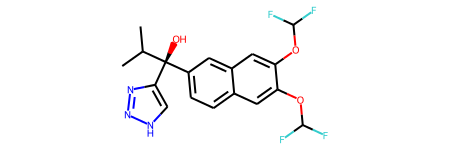

In [9950]:
M1 = mol_list [0]
M1

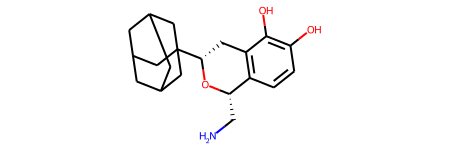

In [9951]:
M2 = mol_list [1]
M2

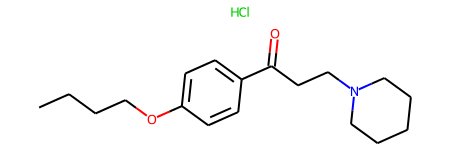

In [9952]:
M3 = mol_list [2]
M3

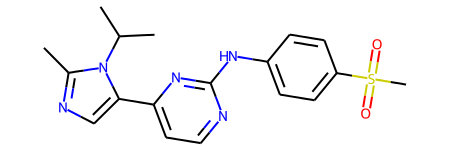

In [9953]:
M4 = mol_list [3]
M4

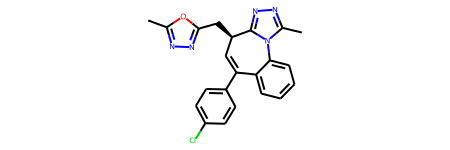

In [9954]:
M5 = mol_list [4]
M5

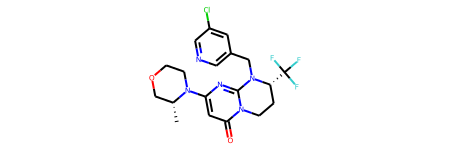

In [9955]:
M6 = mol_list [5]
M6

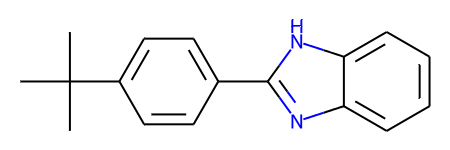

In [9956]:
M7 = mol_list [6]
M7

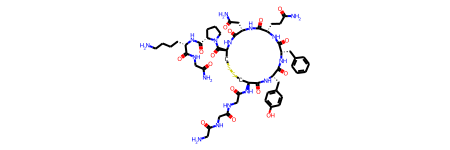

In [9957]:
M8 = mol_list [7]
M8

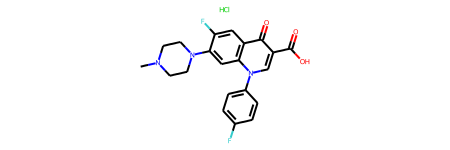

In [9958]:
M9 = mol_list [8]
M9

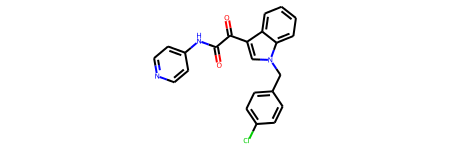

In [9959]:
M10 = mol_list [9]
M10

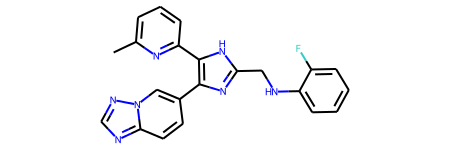

In [9960]:
M11 = mol_list [10]
M11

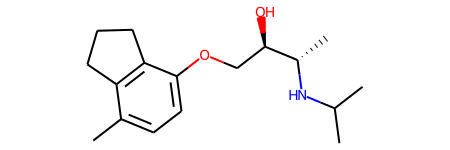

In [9961]:
M12 = mol_list [11]
M12

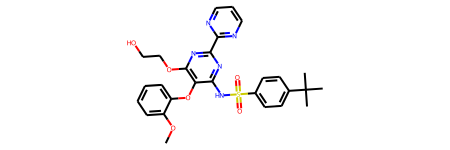

In [9962]:
M13 = mol_list [12]
M13

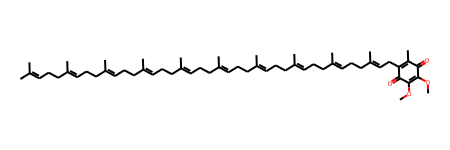

In [9963]:
M14 = mol_list [13]
M14

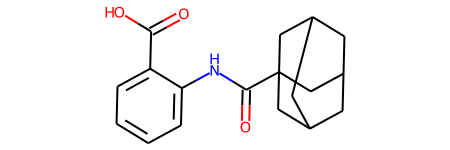

In [9964]:
M15 = mol_list [14]
M15

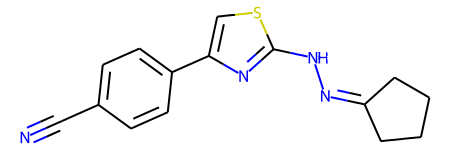

In [9965]:
M16 = mol_list [15]
M16

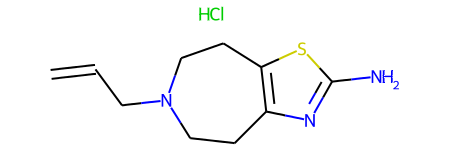

In [9966]:
M17 = mol_list [16]
M17

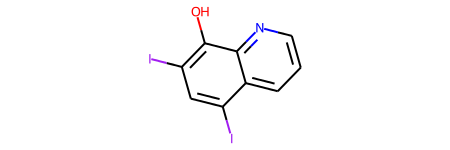

In [9967]:
M18 = mol_list [17]
M18

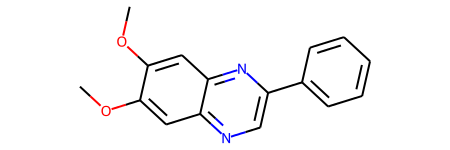

In [9968]:
M19 = mol_list [18]
M19

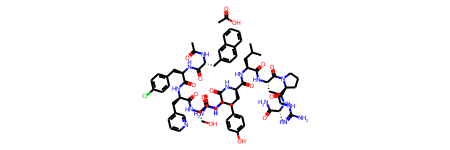

In [9969]:
M20 = mol_list [19]
M20

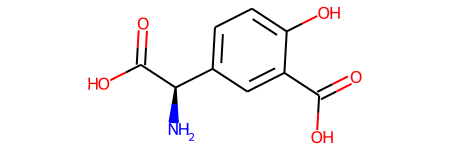

In [9970]:
M21 = mol_list [20]
M21

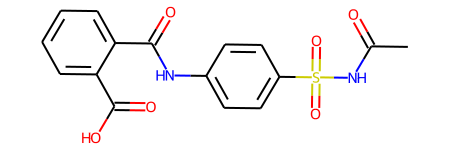

In [9971]:
M22 = mol_list [21]
M22

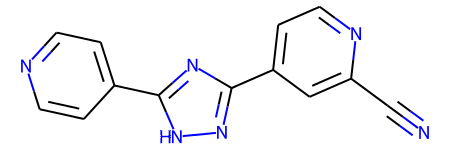

In [9972]:
M23 = mol_list [22]
M23

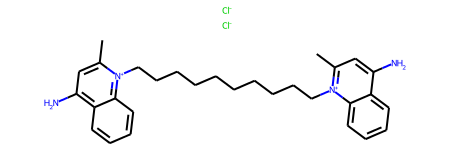

In [9973]:
M24 = mol_list [23]
M24

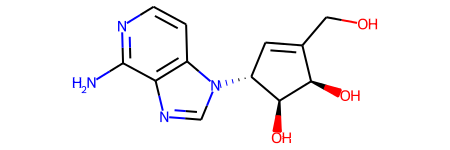

In [9974]:
M25 = mol_list [24]
M25

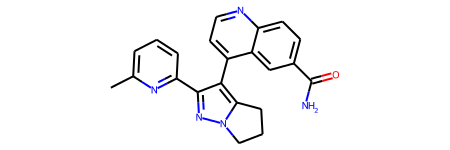

In [9975]:
M26 = mol_list [25]
M26

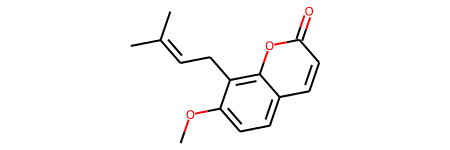

In [9976]:
M27 = mol_list [26]
M27

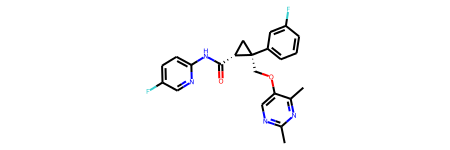

In [9977]:
M28 = mol_list [27]
M28

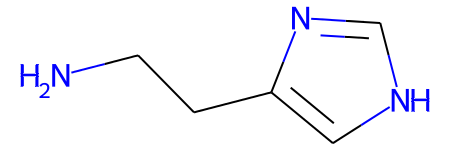

In [9978]:
M29 = mol_list [28]
M29

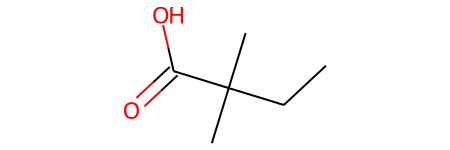

In [9979]:
M30 = mol_list [29]
M30

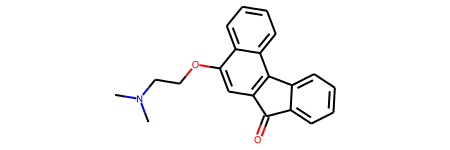

In [9980]:
M31 = mol_list [30]
M31

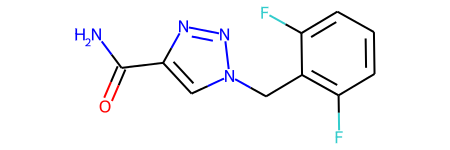

In [9981]:
M32 = mol_list [31]
M32

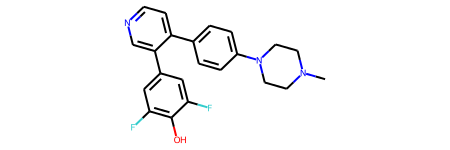

In [9982]:
M33 = mol_list [32]
M33

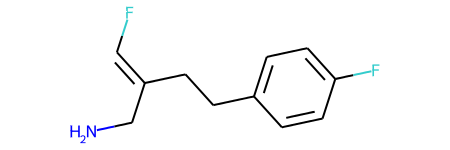

In [9983]:
M34 = mol_list [33]
M34

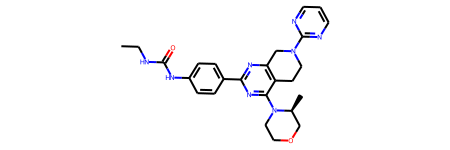

In [9984]:
M35 = mol_list [34]
M35

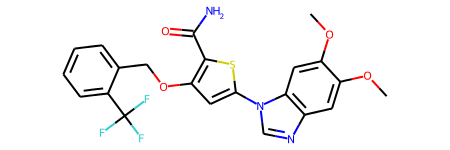

In [9985]:
M36 = mol_list [35]
M36

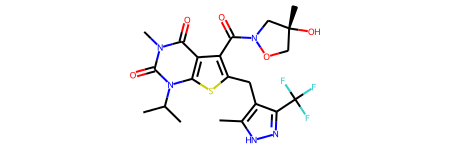

In [9986]:
M37= mol_list [36]
M37

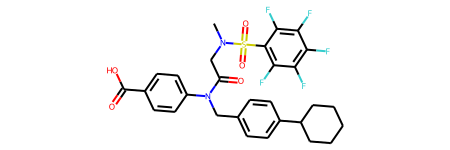

In [9987]:
M38= mol_list [37]
M38

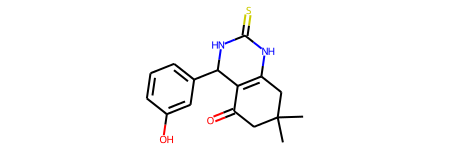

In [9988]:
M39= mol_list [38]
M39

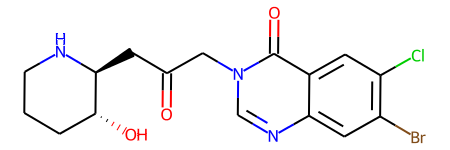

In [9989]:
M40= mol_list [39]
M40

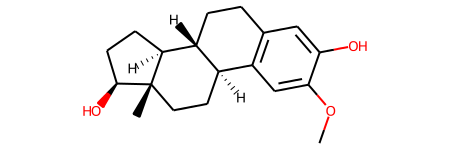

In [9990]:
M41= mol_list [40]
M41

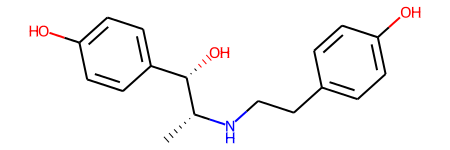

In [9991]:
M42= mol_list [41]
M42

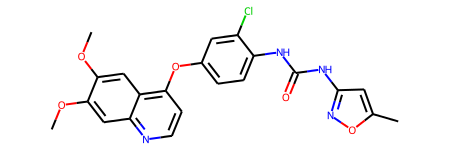

In [9992]:
M43= mol_list [42]
M43

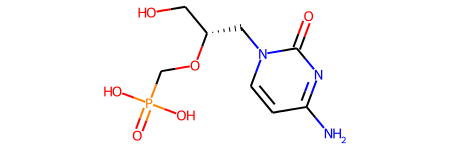

In [9993]:
M44= mol_list [43]
M44

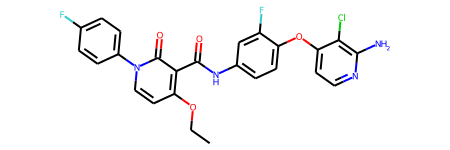

In [9994]:
M45= mol_list [44]
M45

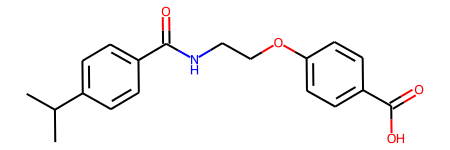

In [9995]:
M46= mol_list [45]
M46

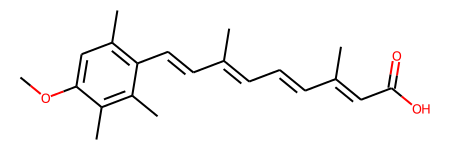

In [9996]:
M47= mol_list [46]
M47

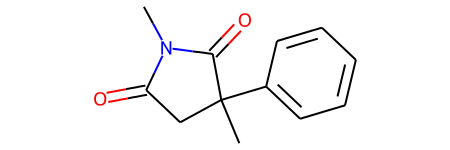

In [9997]:
M48= mol_list [47]
M48

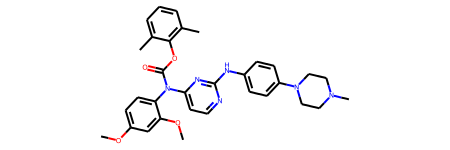

In [9998]:
M49= mol_list [48]
M49

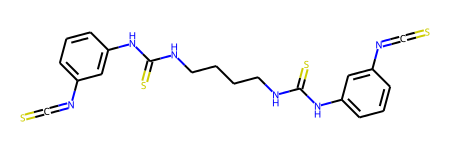

In [9999]:
M50= mol_list [49]
M50

In [10000]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 26,
 29,
 33,
 90,
 114,
 118,
 133,
 140,
 184,
 203,
 206,
 231,
 283,
 319,
 322,
 356,
 378,
 393,
 432,
 551,
 595,
 611,
 641,
 664,
 695,
 723,
 726,
 733,
 807,
 831,
 849,
 855,
 875,
 876,
 884,
 893,
 904,
 909,
 922,
 946,
 958]

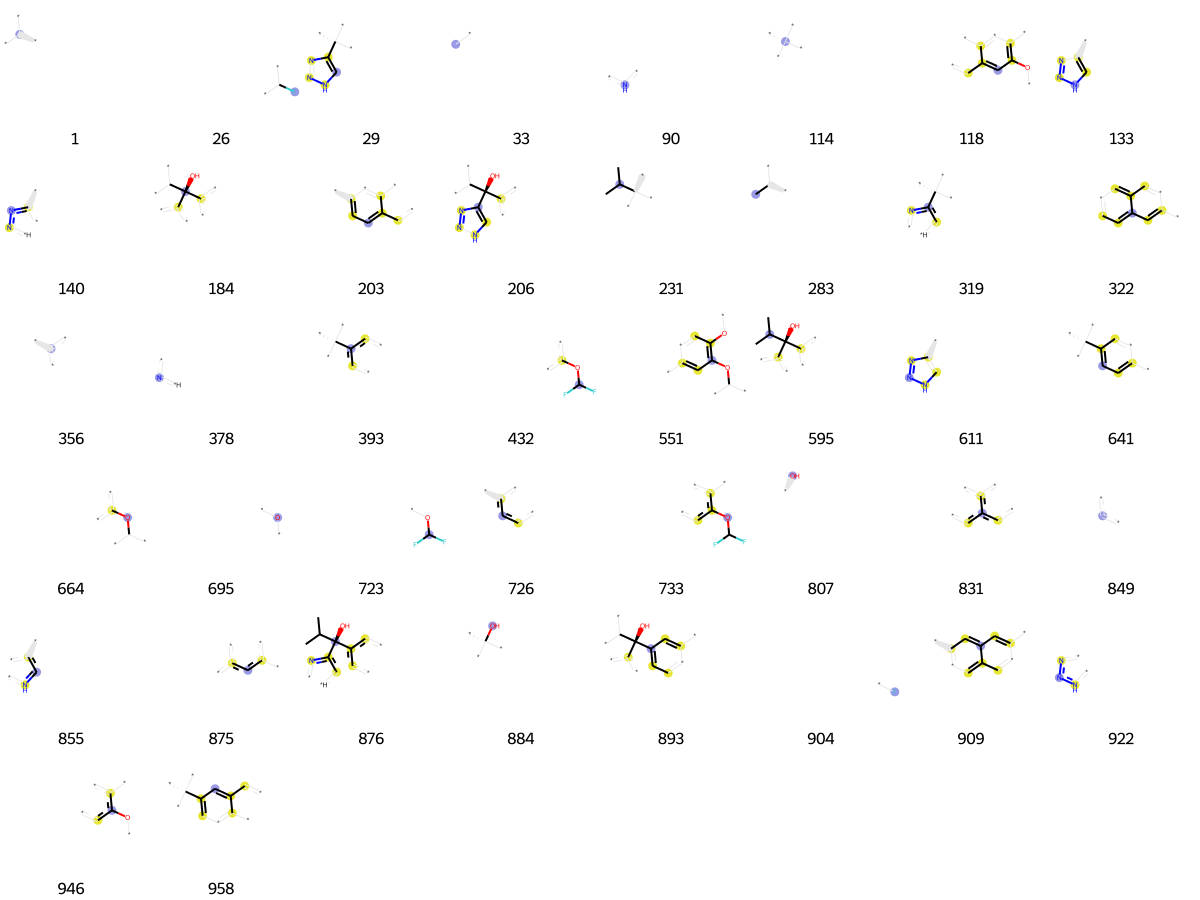

In [10001]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [10002]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[3,
 15,
 25,
 36,
 80,
 118,
 147,
 201,
 202,
 231,
 268,
 309,
 356,
 361,
 422,
 451,
 487,
 517,
 519,
 578,
 583,
 656,
 675,
 679,
 697,
 706,
 726,
 736,
 807,
 849,
 895,
 897,
 926,
 952,
 968,
 981,
 1016,
 1019]

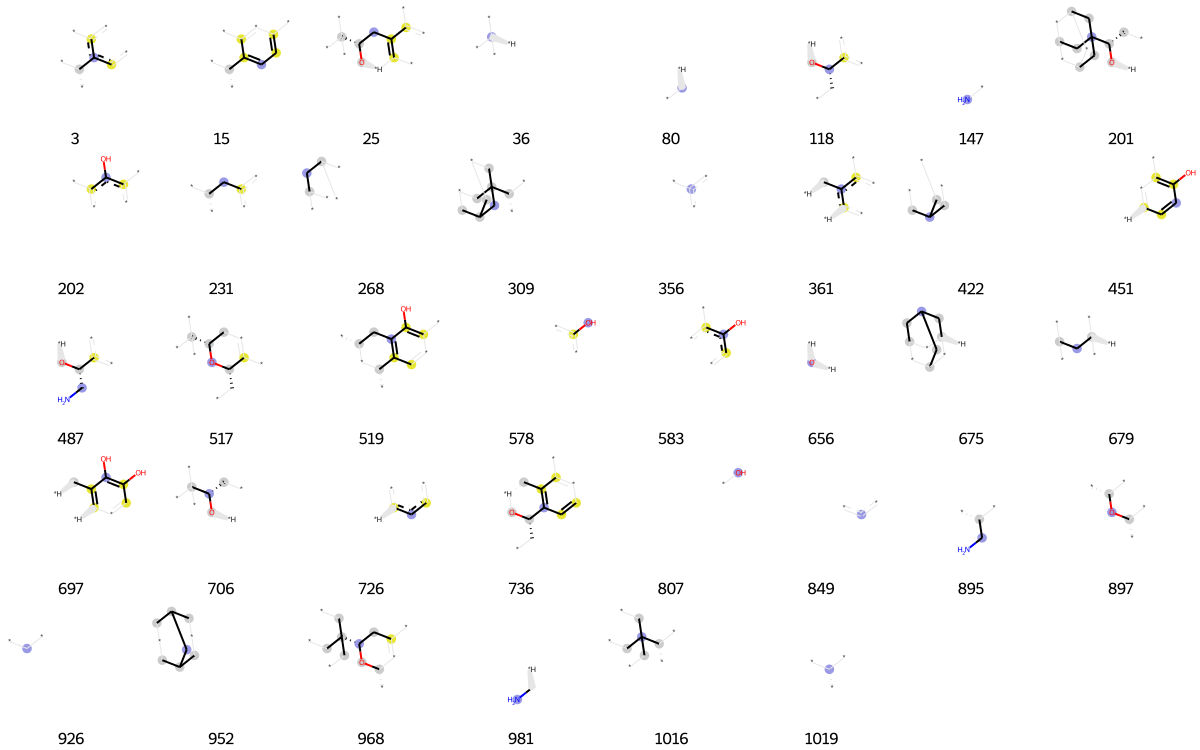

In [10003]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [10004]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[2,
 4,
 10,
 13,
 33,
 80,
 102,
 121,
 294,
 322,
 356,
 361,
 398,
 427,
 428,
 456,
 458,
 514,
 533,
 540,
 591,
 594,
 650,
 669,
 673,
 695,
 718,
 726,
 767,
 794,
 807,
 849,
 873,
 887,
 893,
 926,
 935,
 974]

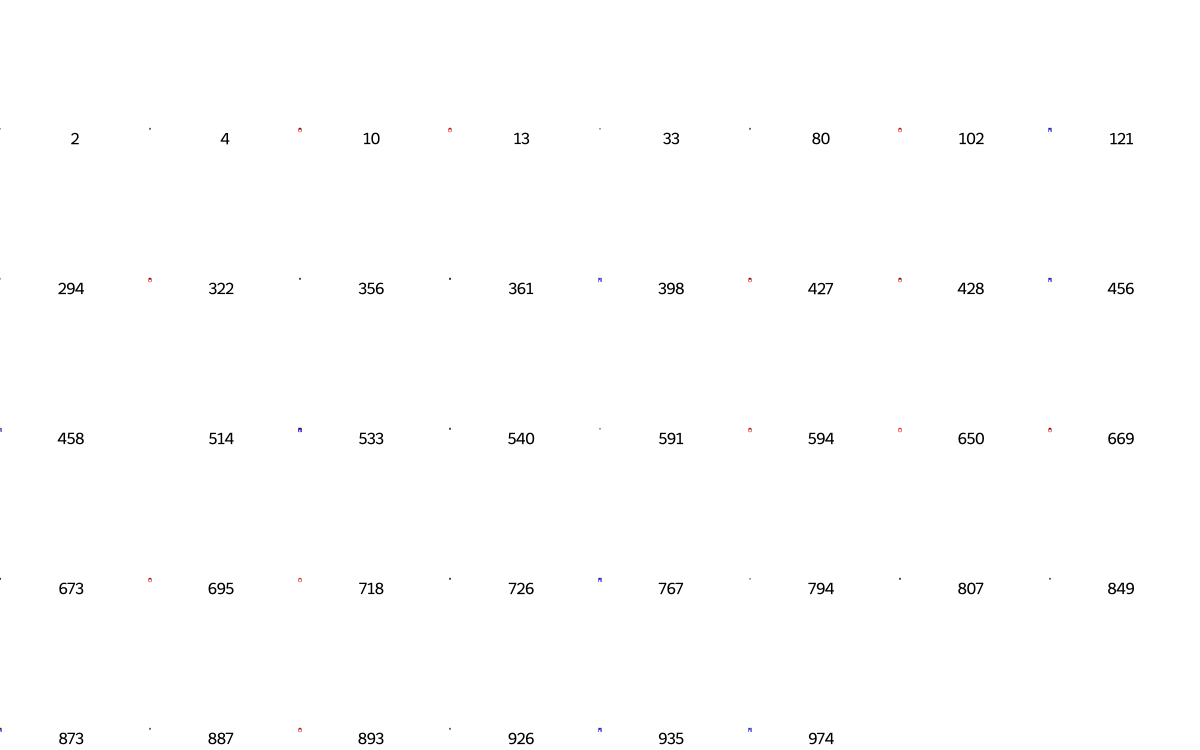

In [10005]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [10006]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 33,
 61,
 128,
 157,
 164,
 191,
 252,
 283,
 319,
 350,
 356,
 378,
 399,
 428,
 452,
 458,
 491,
 500,
 511,
 558,
 562,
 643,
 650,
 668,
 692,
 698,
 715,
 726,
 742,
 787,
 795,
 831,
 842,
 843,
 849,
 862,
 876,
 891,
 906,
 907,
 917,
 935,
 936,
 955,
 980]

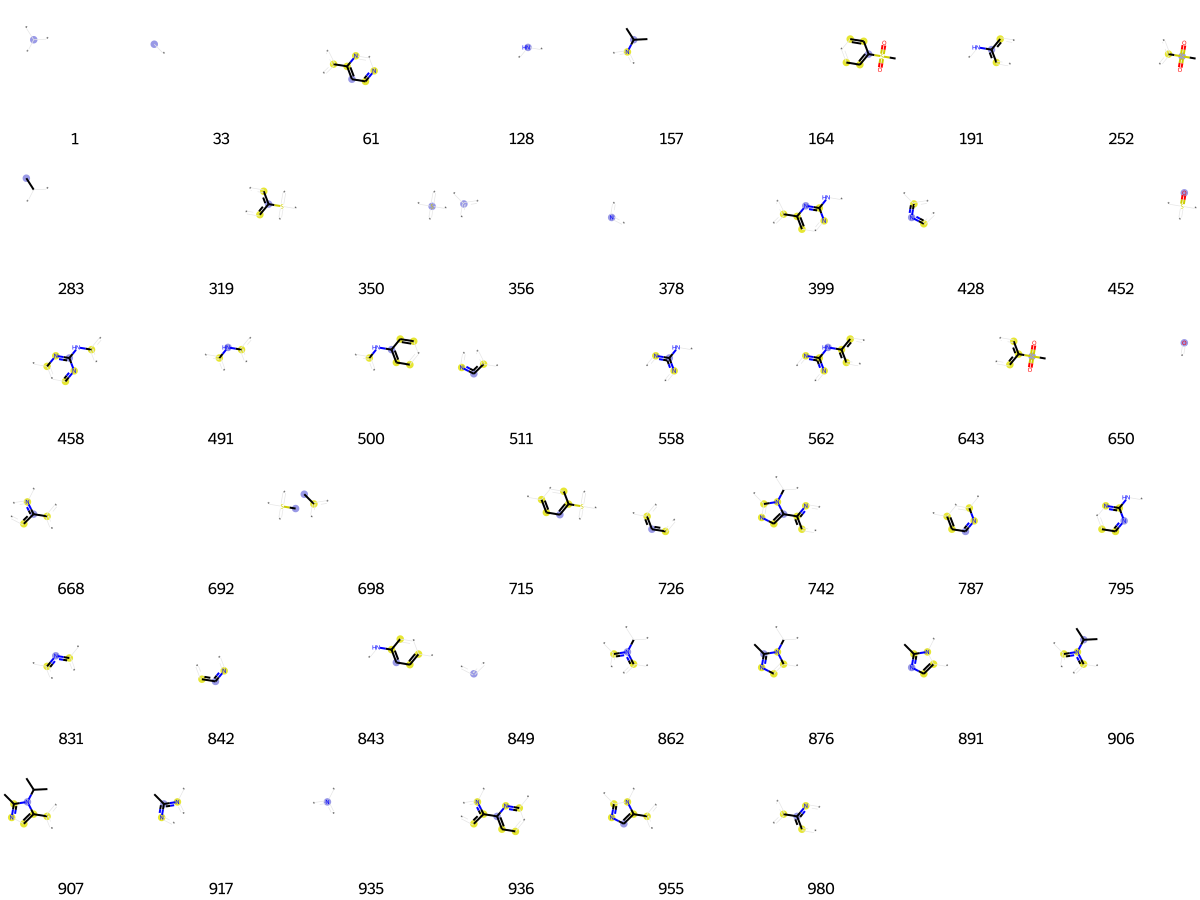

In [10007]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [10008]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[5,
 32,
 33,
 46,
 64,
 80,
 136,
 140,
 143,
 163,
 168,
 175,
 216,
 256,
 271,
 309,
 352,
 356,
 378,
 382,
 383,
 458,
 495,
 544,
 561,
 574,
 580,
 623,
 643,
 654,
 656,
 659,
 686,
 698,
 715,
 726,
 728,
 789,
 816,
 849,
 896,
 917,
 918,
 935,
 958,
 969,
 984,
 990,
 1019]

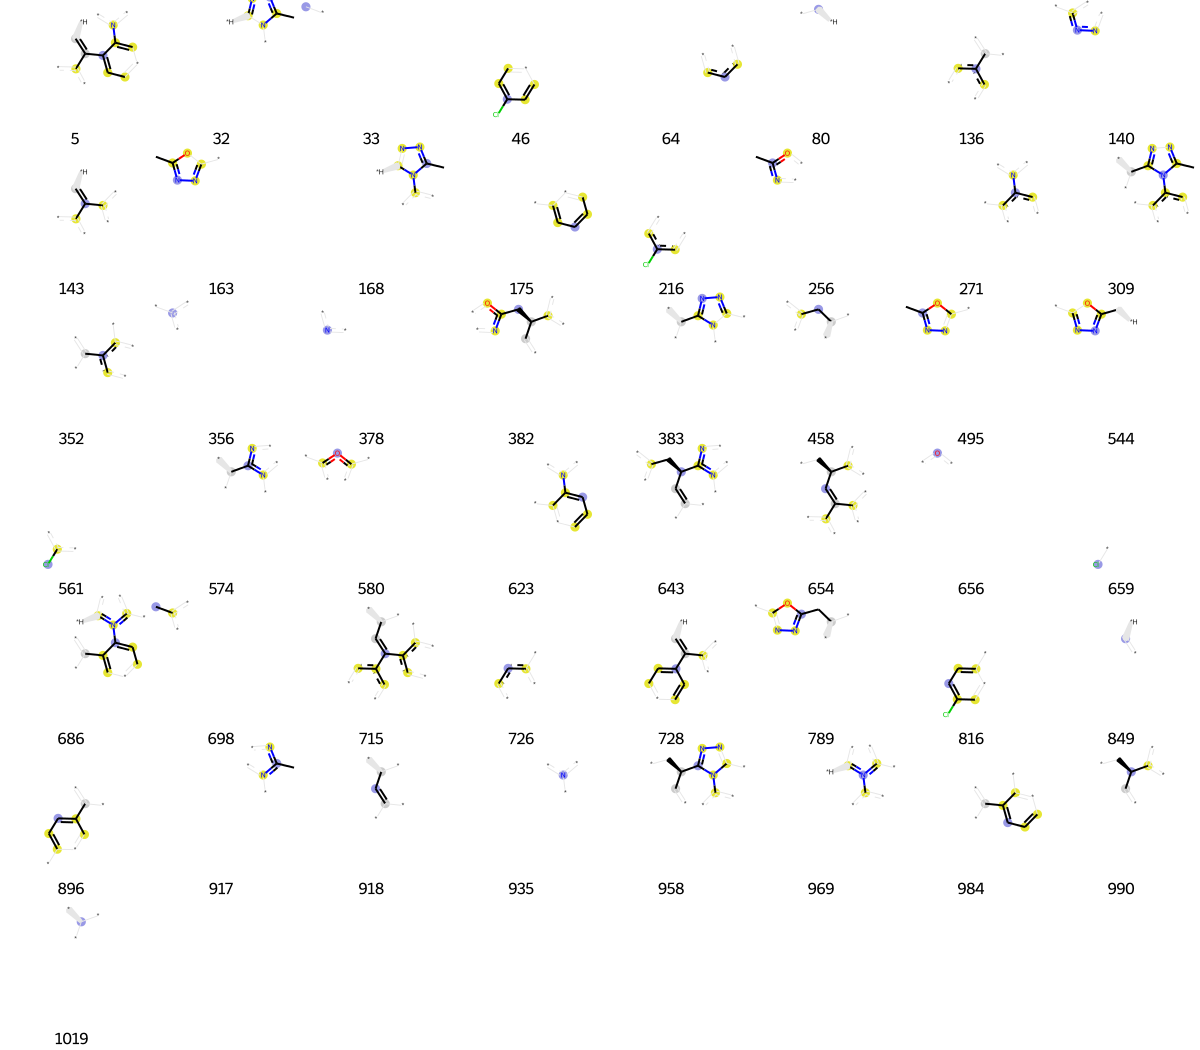

In [10009]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [10010]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[17,
 27,
 33,
 37,
 80,
 102,
 114,
 117,
 119,
 142,
 159,
 198,
 216,
 261,
 285,
 301,
 314,
 341,
 356,
 378,
 417,
 422,
 429,
 456,
 472,
 511,
 523,
 527,
 557,
 561,
 579,
 585,
 597,
 636,
 645,
 650,
 656,
 659,
 680,
 684,
 715,
 725,
 730,
 734,
 741,
 750,
 751,
 759,
 831,
 849,
 875,
 899,
 901,
 904,
 926,
 935,
 950,
 961,
 1012,
 1019]

In [10011]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 64,
 73,
 90,
 114,
 119,
 136,
 175,
 180,
 289,
 315,
 343,
 356,
 378,
 392,
 393,
 430,
 532,
 535,
 585,
 641,
 674,
 721,
 726,
 759,
 788,
 831,
 849,
 896]

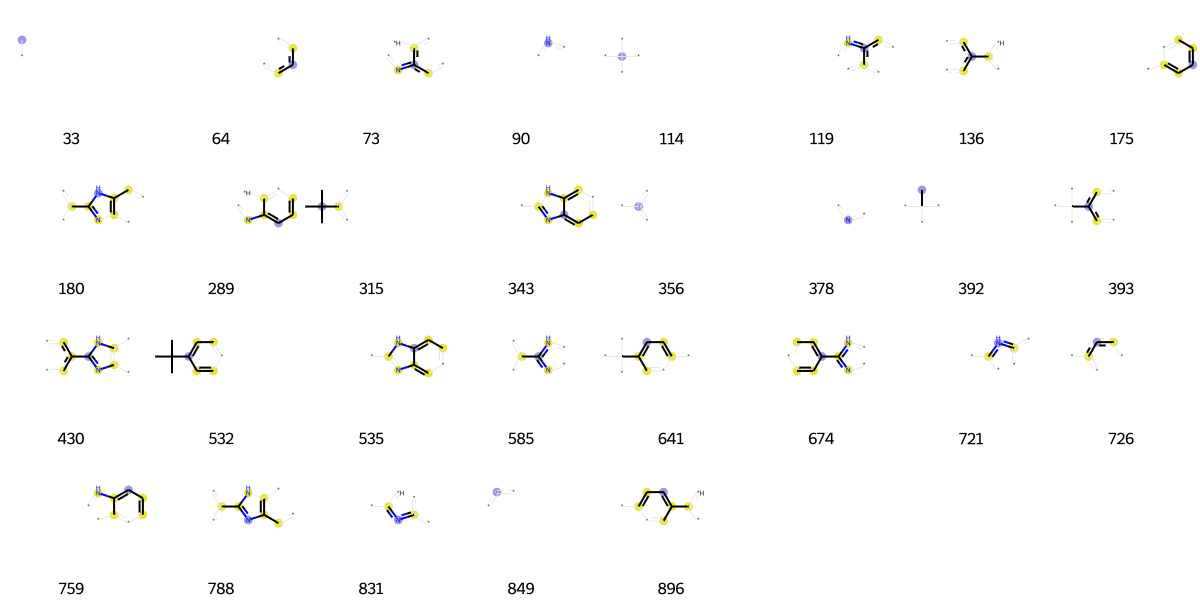

In [10012]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [10013]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 4,
 10,
 27,
 41,
 42,
 58,
 64,
 80,
 83,
 90,
 102,
 115,
 117,
 128,
 140,
 143,
 147,
 173,
 175,
 193,
 197,
 220,
 242,
 244,
 253,
 259,
 282,
 289,
 301,
 310,
 314,
 354,
 355,
 356,
 362,
 369,
 385,
 387,
 389,
 392,
 398,
 402,
 416,
 432,
 435,
 446,
 456,
 458,
 478,
 493,
 503,
 509,
 511,
 531,
 540,
 545,
 551,
 559,
 573,
 578,
 594,
 597,
 616,
 624,
 626,
 650,
 665,
 675,
 689,
 691,
 726,
 730,
 736,
 739,
 745,
 754,
 767,
 798,
 804,
 807,
 816,
 828,
 832,
 837,
 846,
 849,
 874,
 887,
 893,
 898,
 899,
 926,
 935,
 957,
 976,
 981,
 1004,
 1019]

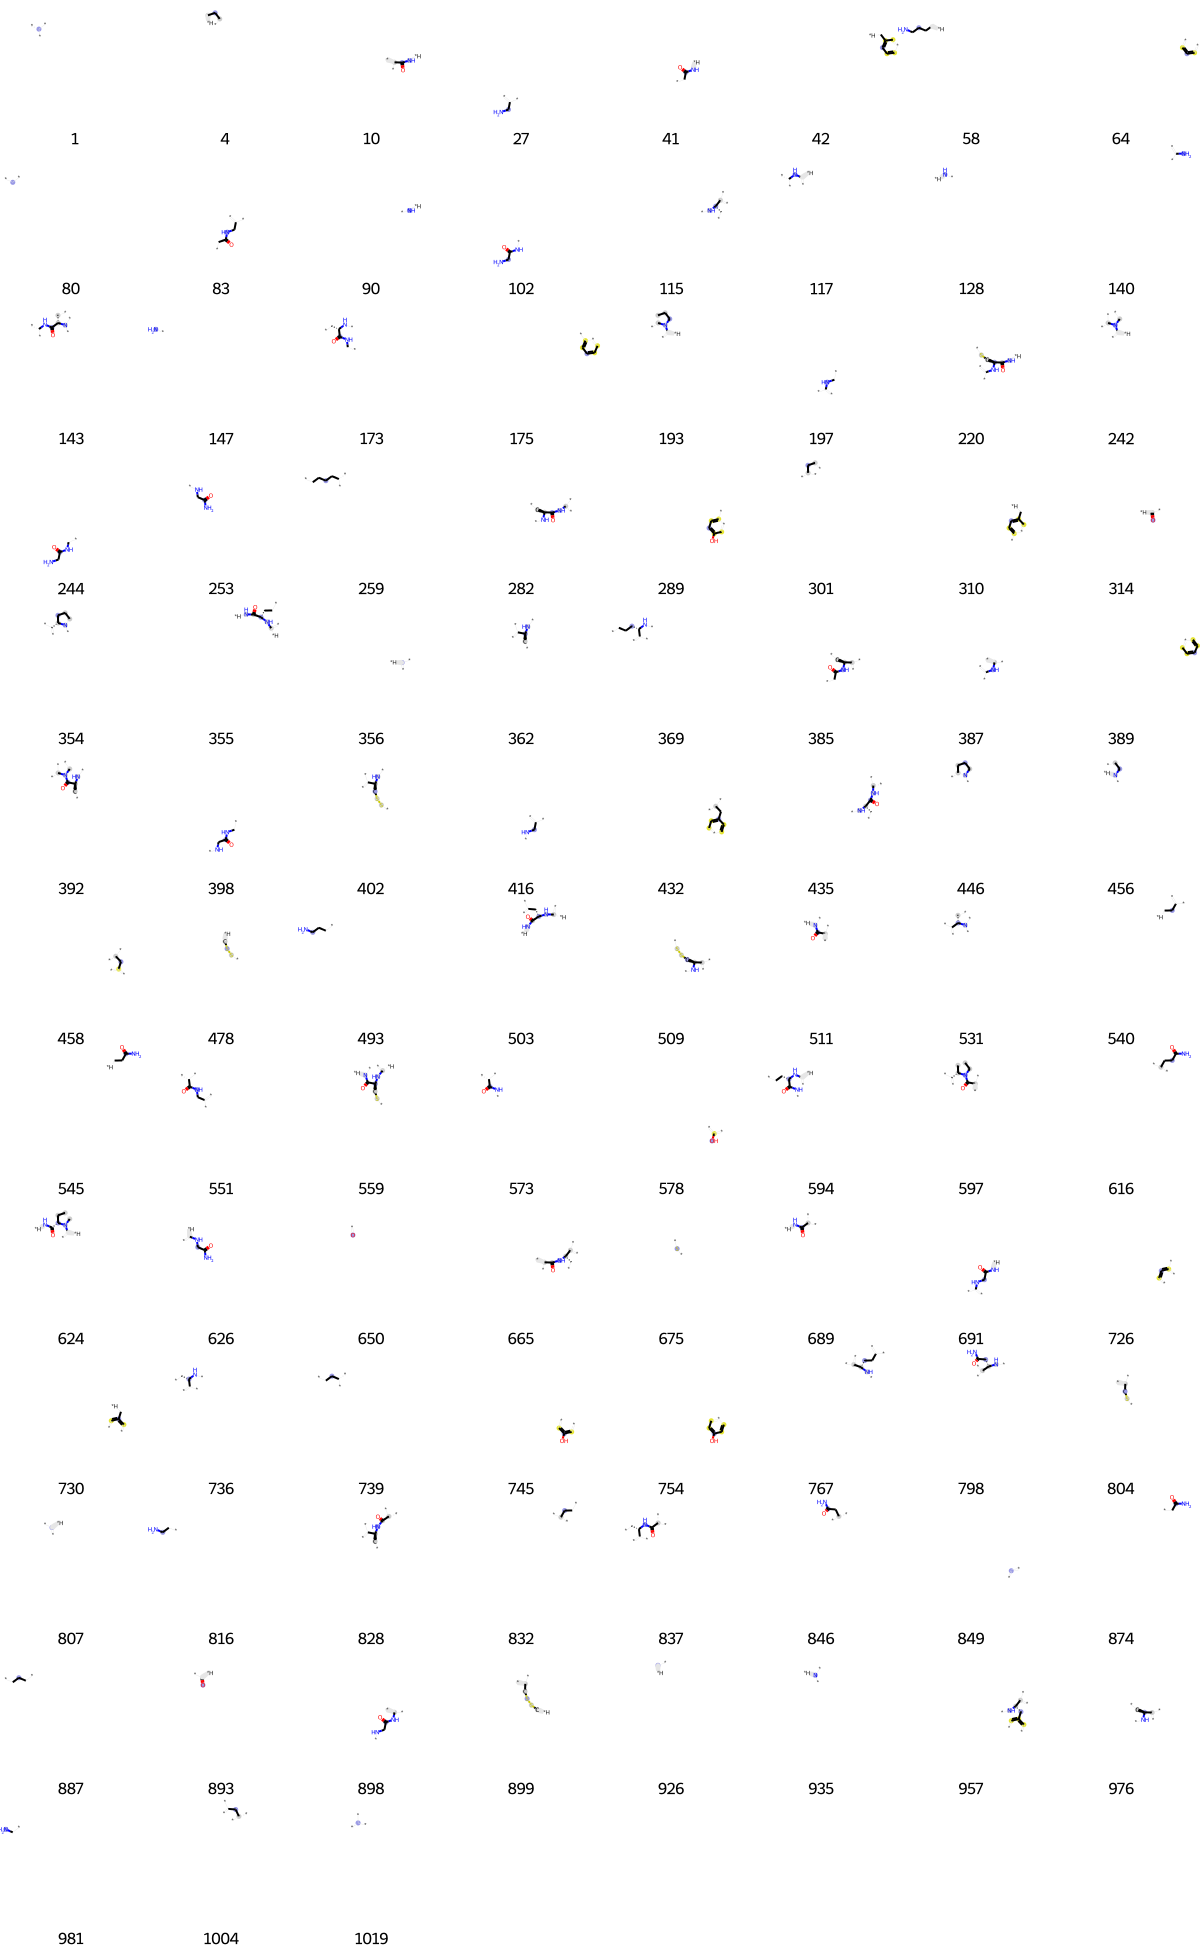

In [10014]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [10015]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[14,
 23,
 33,
 45,
 90,
 121,
 164,
 207,
 212,
 231,
 233,
 236,
 271,
 308,
 314,
 333,
 356,
 386,
 389,
 407,
 432,
 453,
 456,
 464,
 484,
 514,
 525,
 564,
 580,
 646,
 650,
 699,
 705,
 713,
 726,
 801,
 807,
 816,
 849,
 875,
 880,
 893,
 904,
 926,
 935,
 958,
 967,
 974]

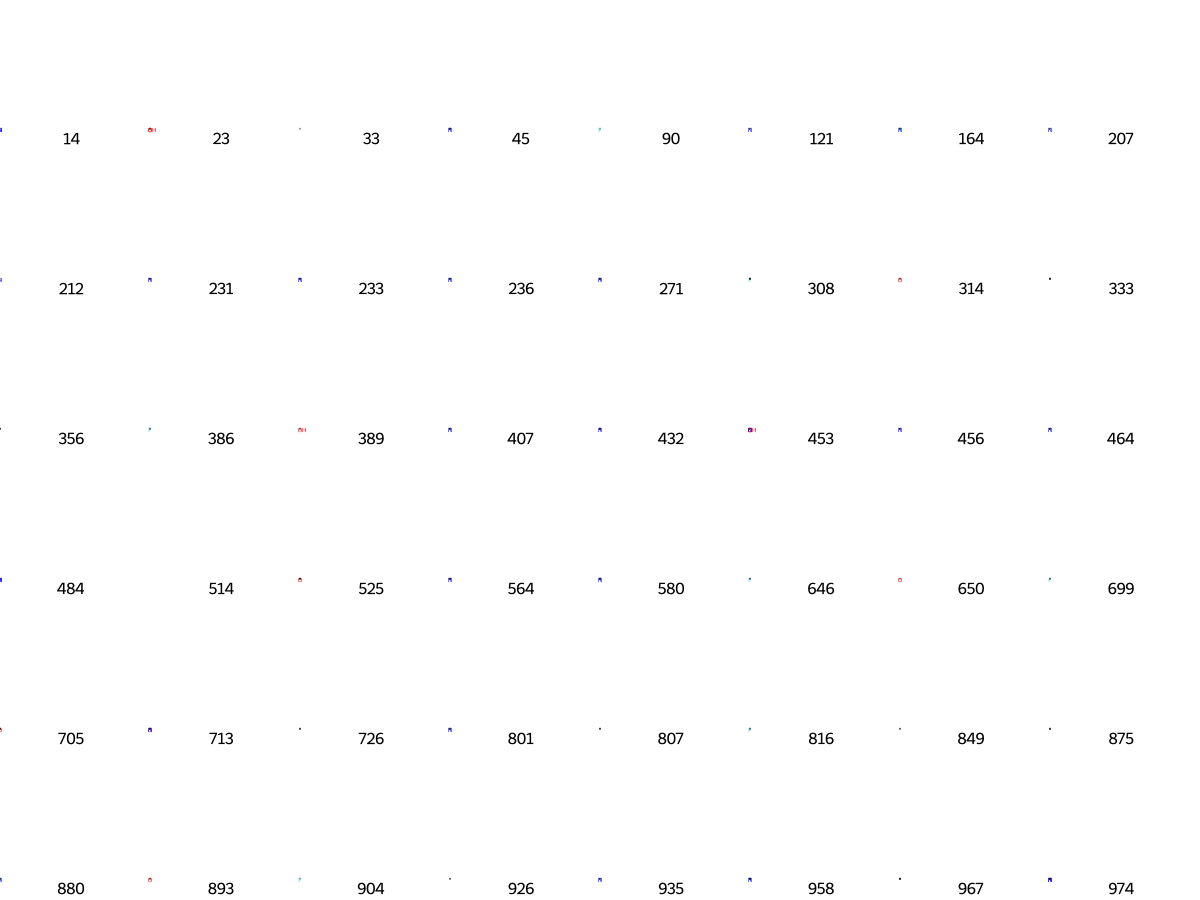

In [10016]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [10017]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[11,
 45,
 46,
 53,
 58,
 61,
 64,
 79,
 80,
 122,
 128,
 132,
 175,
 184,
 186,
 191,
 216,
 261,
 310,
 328,
 333,
 356,
 378,
 383,
 390,
 431,
 455,
 464,
 477,
 479,
 549,
 561,
 579,
 650,
 659,
 726,
 730,
 741,
 792,
 807,
 816,
 842,
 849,
 893,
 935,
 967]

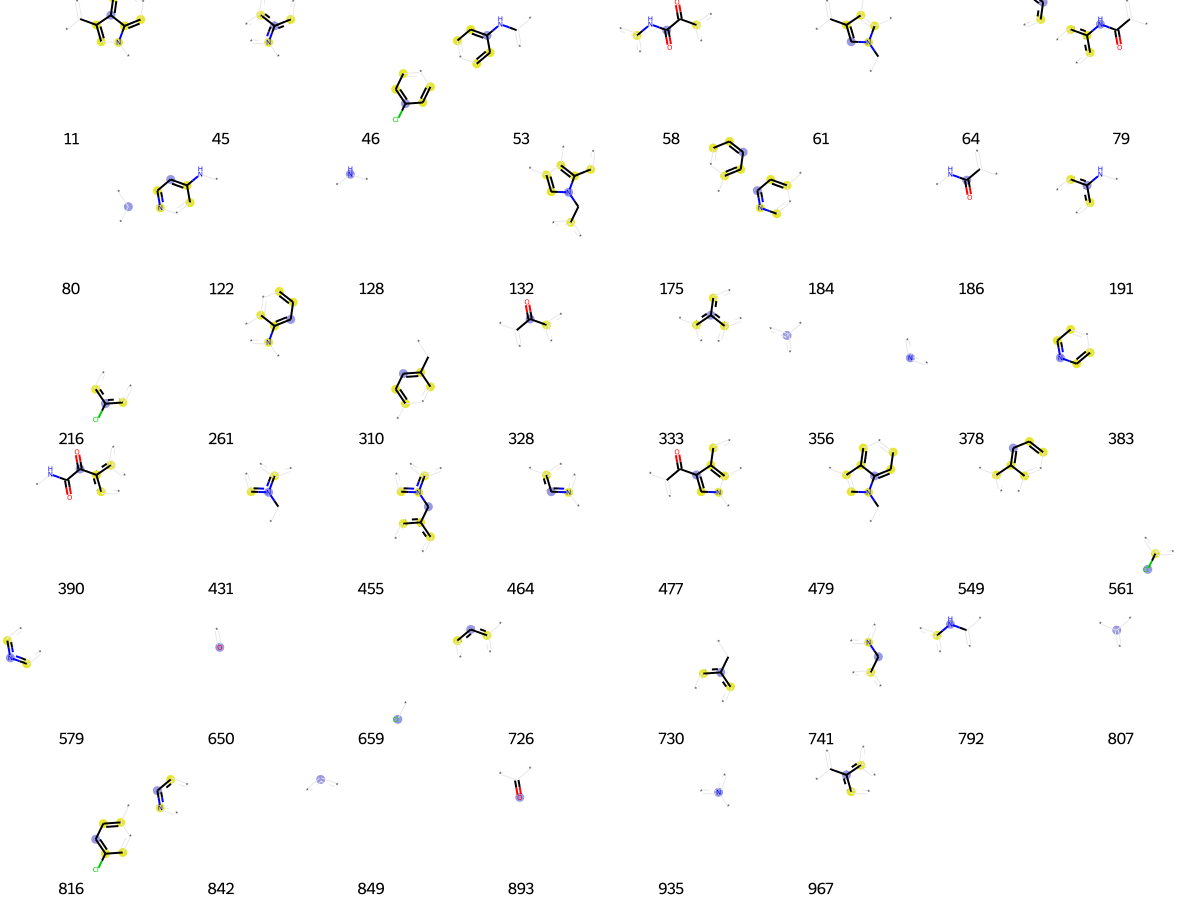

In [10018]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [10019]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[3,
 8,
 15,
 33,
 43,
 64,
 80,
 83,
 90,
 110,
 128,
 136,
 155,
 175,
 179,
 187,
 190,
 200,
 202,
 218,
 231,
 255,
 257,
 260,
 323,
 340,
 356,
 378,
 392,
 394,
 397,
 405,
 428,
 448,
 464,
 489,
 568,
 627,
 633,
 672,
 698,
 699,
 704,
 707,
 721,
 723,
 726,
 816,
 819,
 827,
 831,
 849,
 896,
 904,
 935,
 953,
 980]

In [10020]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[0,
 1,
 4,
 33,
 72,
 80,
 94,
 118,
 128,
 176,
 227,
 283,
 302,
 329,
 348,
 356,
 361,
 367,
 428,
 430,
 488,
 497,
 652,
 667,
 695,
 698,
 714,
 726,
 807,
 849,
 888,
 892,
 926,
 946,
 979,
 982]

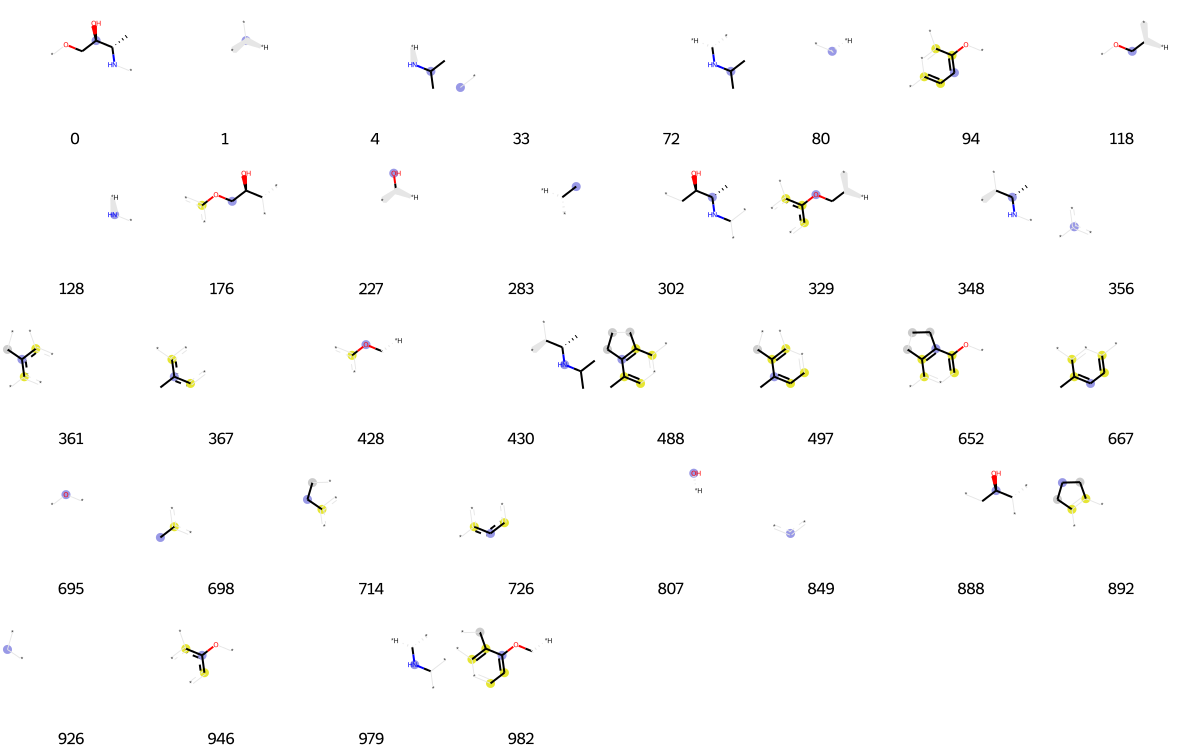

In [10021]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [10022]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[4,
 13,
 33,
 64,
 80,
 81,
 90,
 114,
 128,
 136,
 140,
 175,
 194,
 222,
 242,
 245,
 246,
 249,
 315,
 319,
 333,
 345,
 350,
 356,
 361,
 378,
 380,
 386,
 392,
 393,
 401,
 423,
 428,
 430,
 448,
 452,
 471,
 473,
 502,
 512,
 532,
 587,
 593,
 641,
 650,
 695,
 708,
 714,
 715,
 726,
 807,
 831,
 841,
 842,
 849,
 883,
 887,
 946]

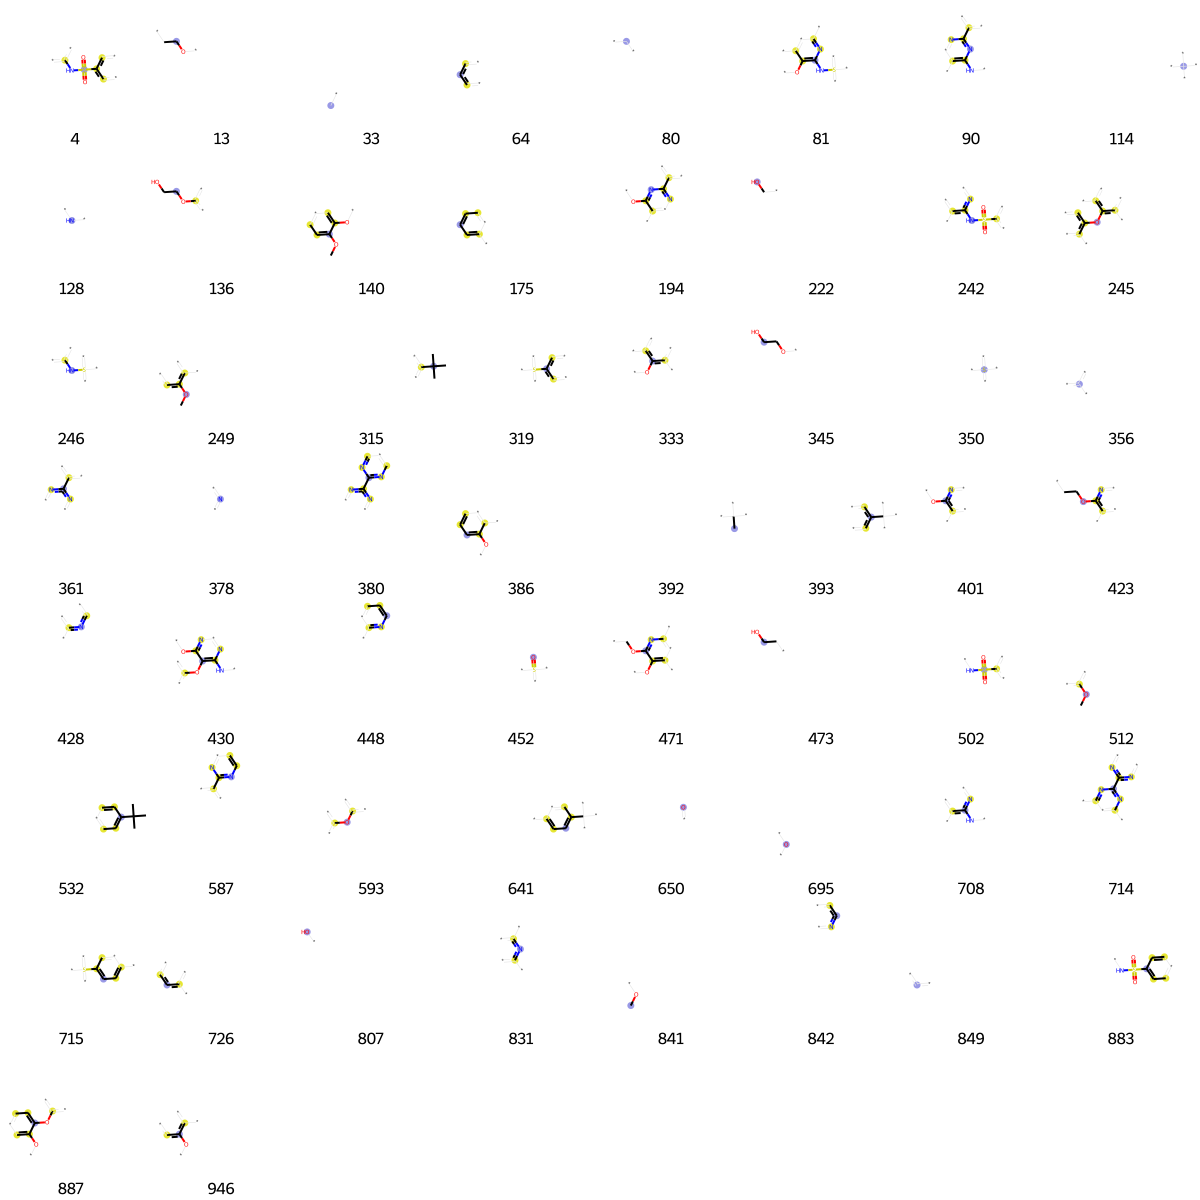

In [10023]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [10024]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 64,
 69,
 80,
 90,
 101,
 169,
 179,
 191,
 208,
 233,
 237,
 314,
 356,
 357,
 385,
 401,
 425,
 452,
 475,
 479,
 512,
 540,
 550,
 558,
 623,
 650,
 690,
 694,
 695,
 698,
 710,
 722,
 807,
 841,
 1017]

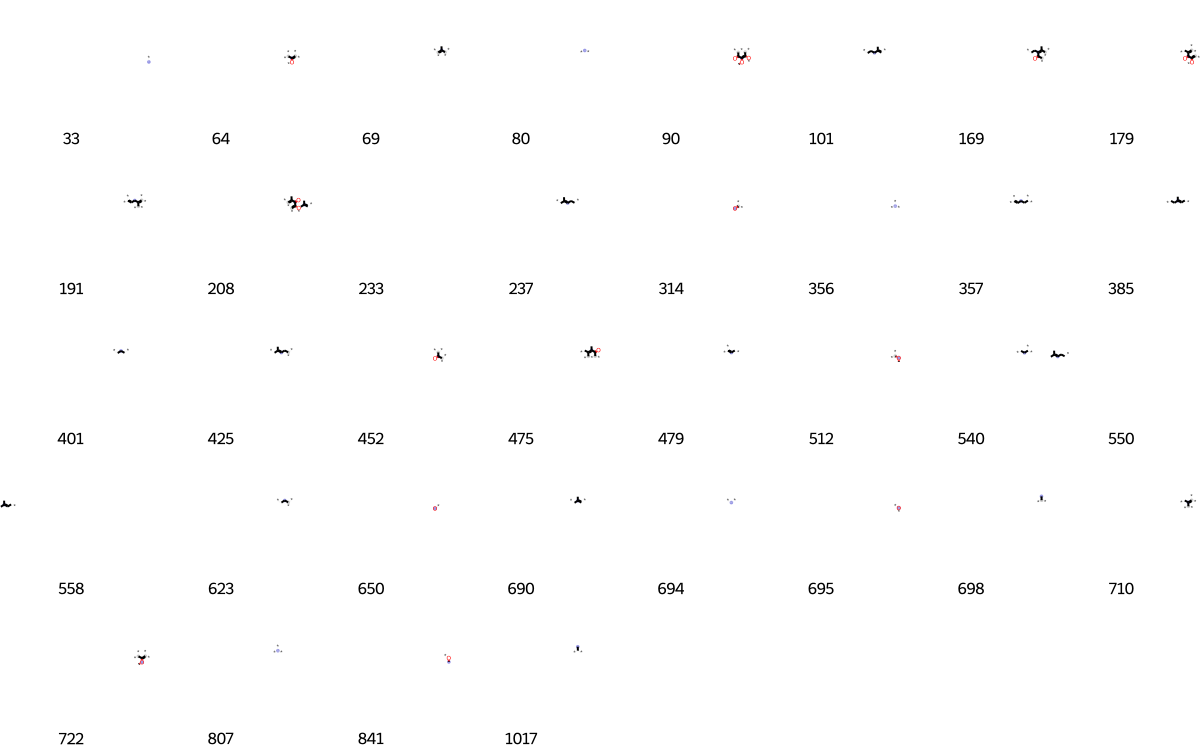

In [10025]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [10026]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[23,
 36,
 64,
 128,
 175,
 200,
 268,
 310,
 356,
 389,
 422,
 423,
 456,
 543,
 650,
 672,
 675,
 679,
 714,
 726,
 745,
 769,
 792,
 807,
 849,
 882,
 893,
 926,
 952,
 967,
 1004,
 1019]

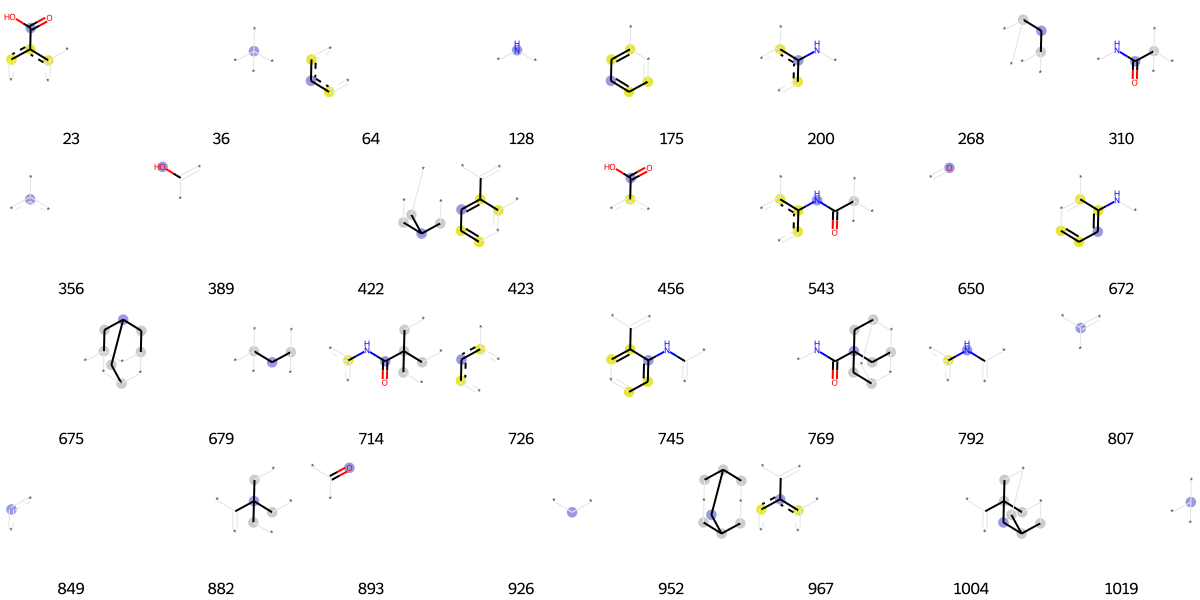

In [10027]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [10028]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[4,
 34,
 102,
 112,
 117,
 128,
 136,
 240,
 242,
 290,
 305,
 310,
 356,
 360,
 361,
 369,
 378,
 385,
 426,
 543,
 546,
 552,
 606,
 674,
 675,
 702,
 714,
 725,
 726,
 755,
 790,
 831,
 849,
 896,
 926,
 930,
 947,
 975,
 980]

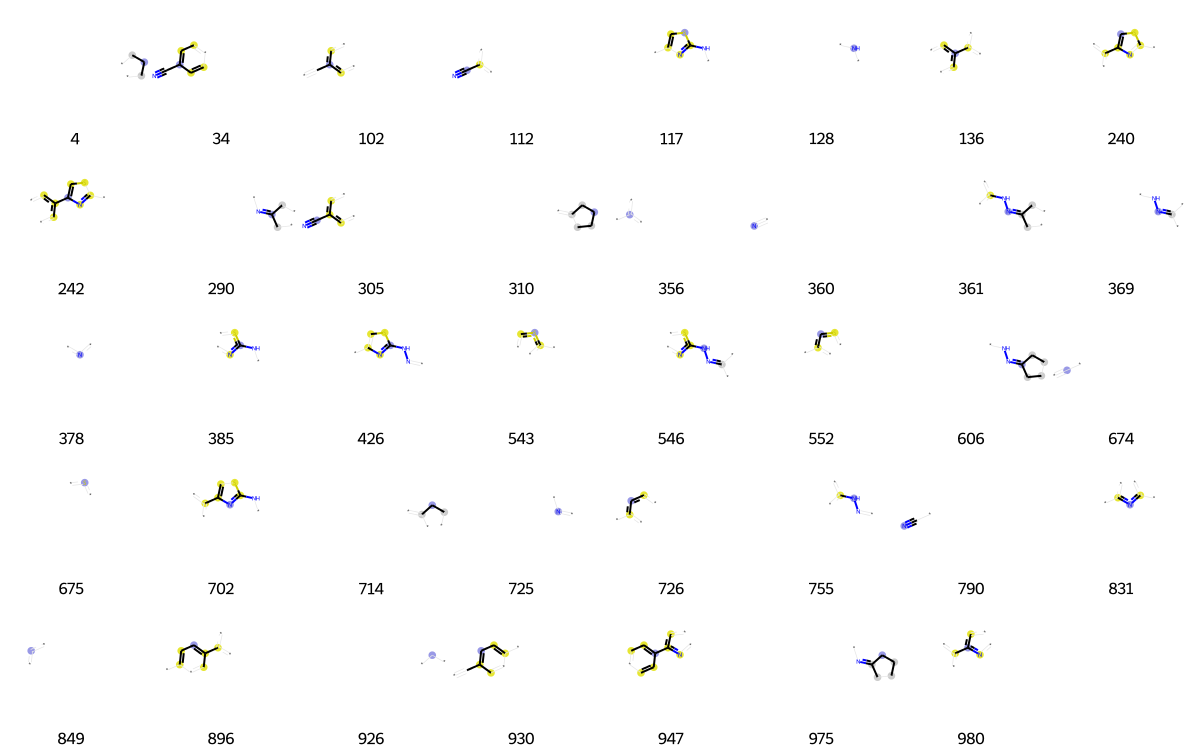

In [10029]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [10030]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[20,
 42,
 80,
 147,
 162,
 167,
 209,
 240,
 277,
 342,
 356,
 378,
 406,
 433,
 453,
 456,
 479,
 502,
 514,
 527,
 621,
 653,
 675,
 694,
 714,
 767,
 796,
 812,
 831,
 924,
 926,
 935,
 940]

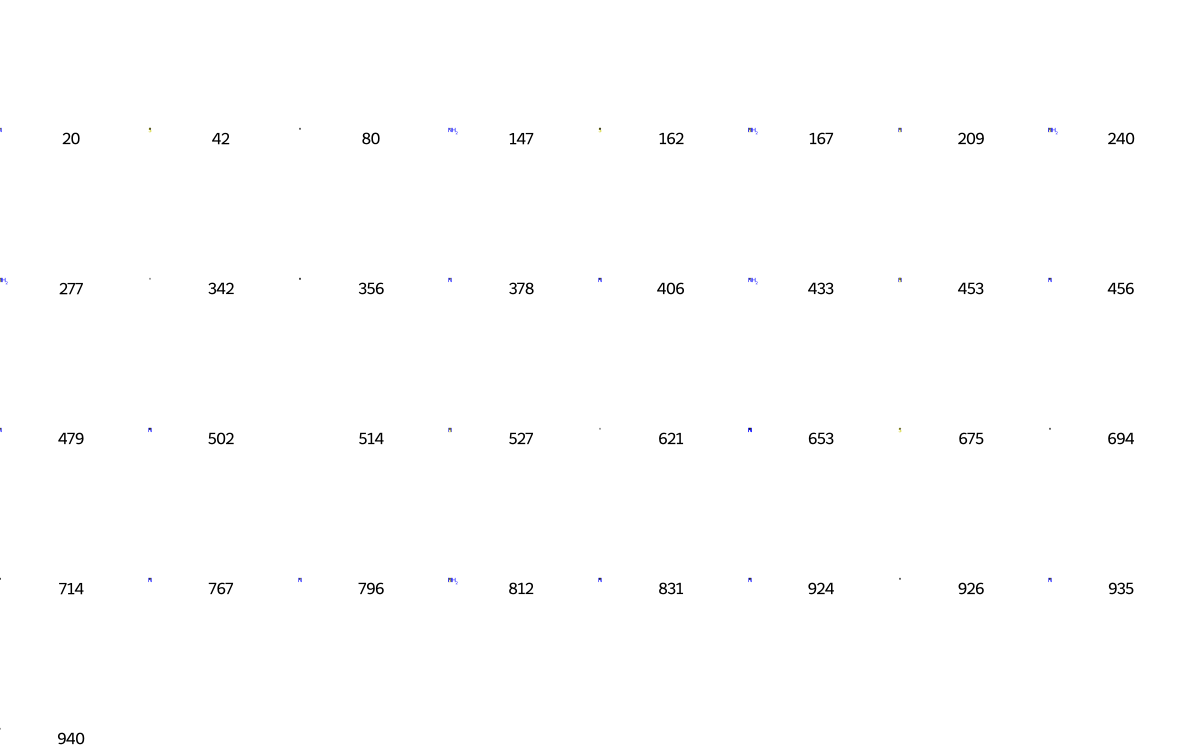

In [10031]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [10032]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[19,
 64,
 88,
 180,
 202,
 333,
 356,
 378,
 428,
 435,
 448,
 473,
 549,
 578,
 582,
 661,
 665,
 700,
 726,
 787,
 807,
 842,
 849,
 875,
 915,
 947]

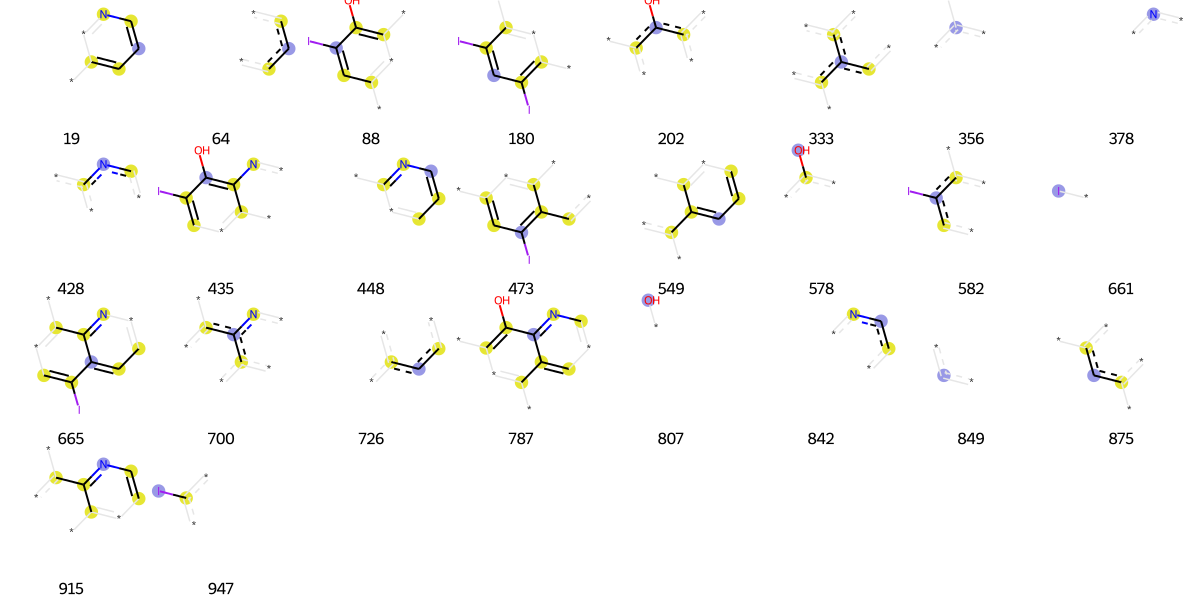

In [10033]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [10034]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 64,
 73,
 118,
 136,
 168,
 175,
 221,
 249,
 267,
 342,
 356,
 378,
 389,
 421,
 428,
 511,
 512,
 695,
 726,
 736,
 773,
 780,
 831,
 841,
 849,
 875,
 946,
 947,
 980]

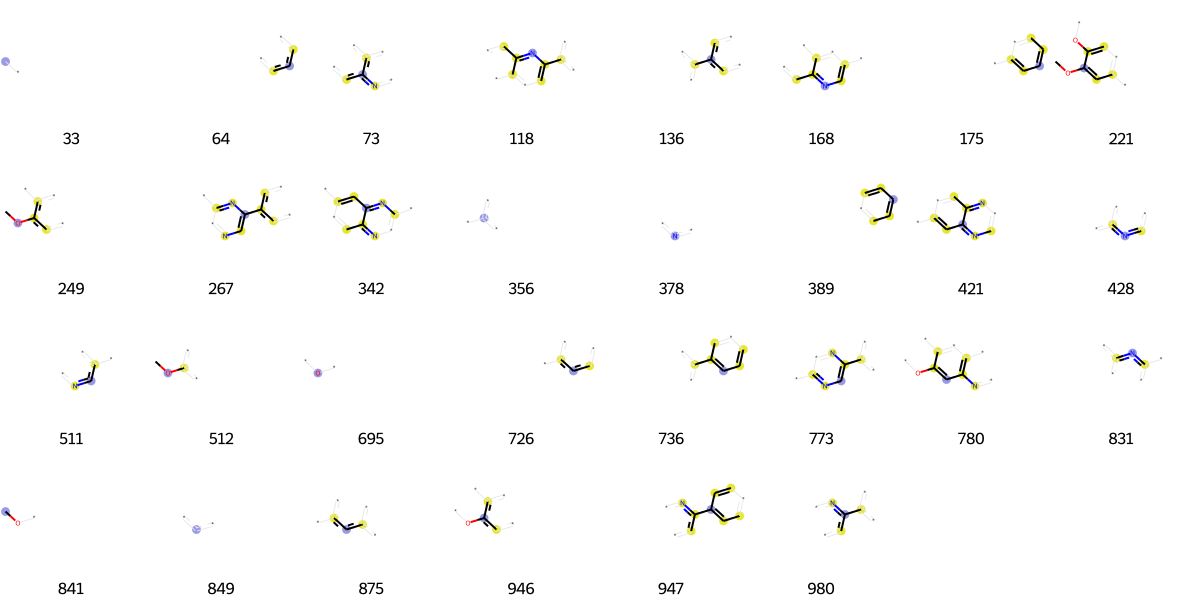

In [10035]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [10036]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 4,
 19,
 24,
 33,
 42,
 46,
 63,
 64,
 79,
 80,
 81,
 86,
 108,
 117,
 128,
 140,
 143,
 147,
 151,
 175,
 188,
 193,
 197,
 203,
 216,
 222,
 235,
 242,
 245,
 280,
 283,
 289,
 301,
 310,
 322,
 354,
 356,
 363,
 369,
 378,
 389,
 409,
 418,
 427,
 437,
 446,
 456,
 458,
 482,
 488,
 496,
 502,
 508,
 511,
 531,
 535,
 561,
 562,
 573,
 578,
 579,
 592,
 594,
 598,
 623,
 624,
 645,
 650,
 659,
 667,
 680,
 689,
 708,
 726,
 730,
 736,
 739,
 745,
 754,
 759,
 798,
 807,
 816,
 823,
 831,
 840,
 842,
 849,
 852,
 857,
 875,
 887,
 893,
 894,
 926,
 927,
 935,
 966,
 982,
 983,
 989,
 992,
 1017,
 1019]

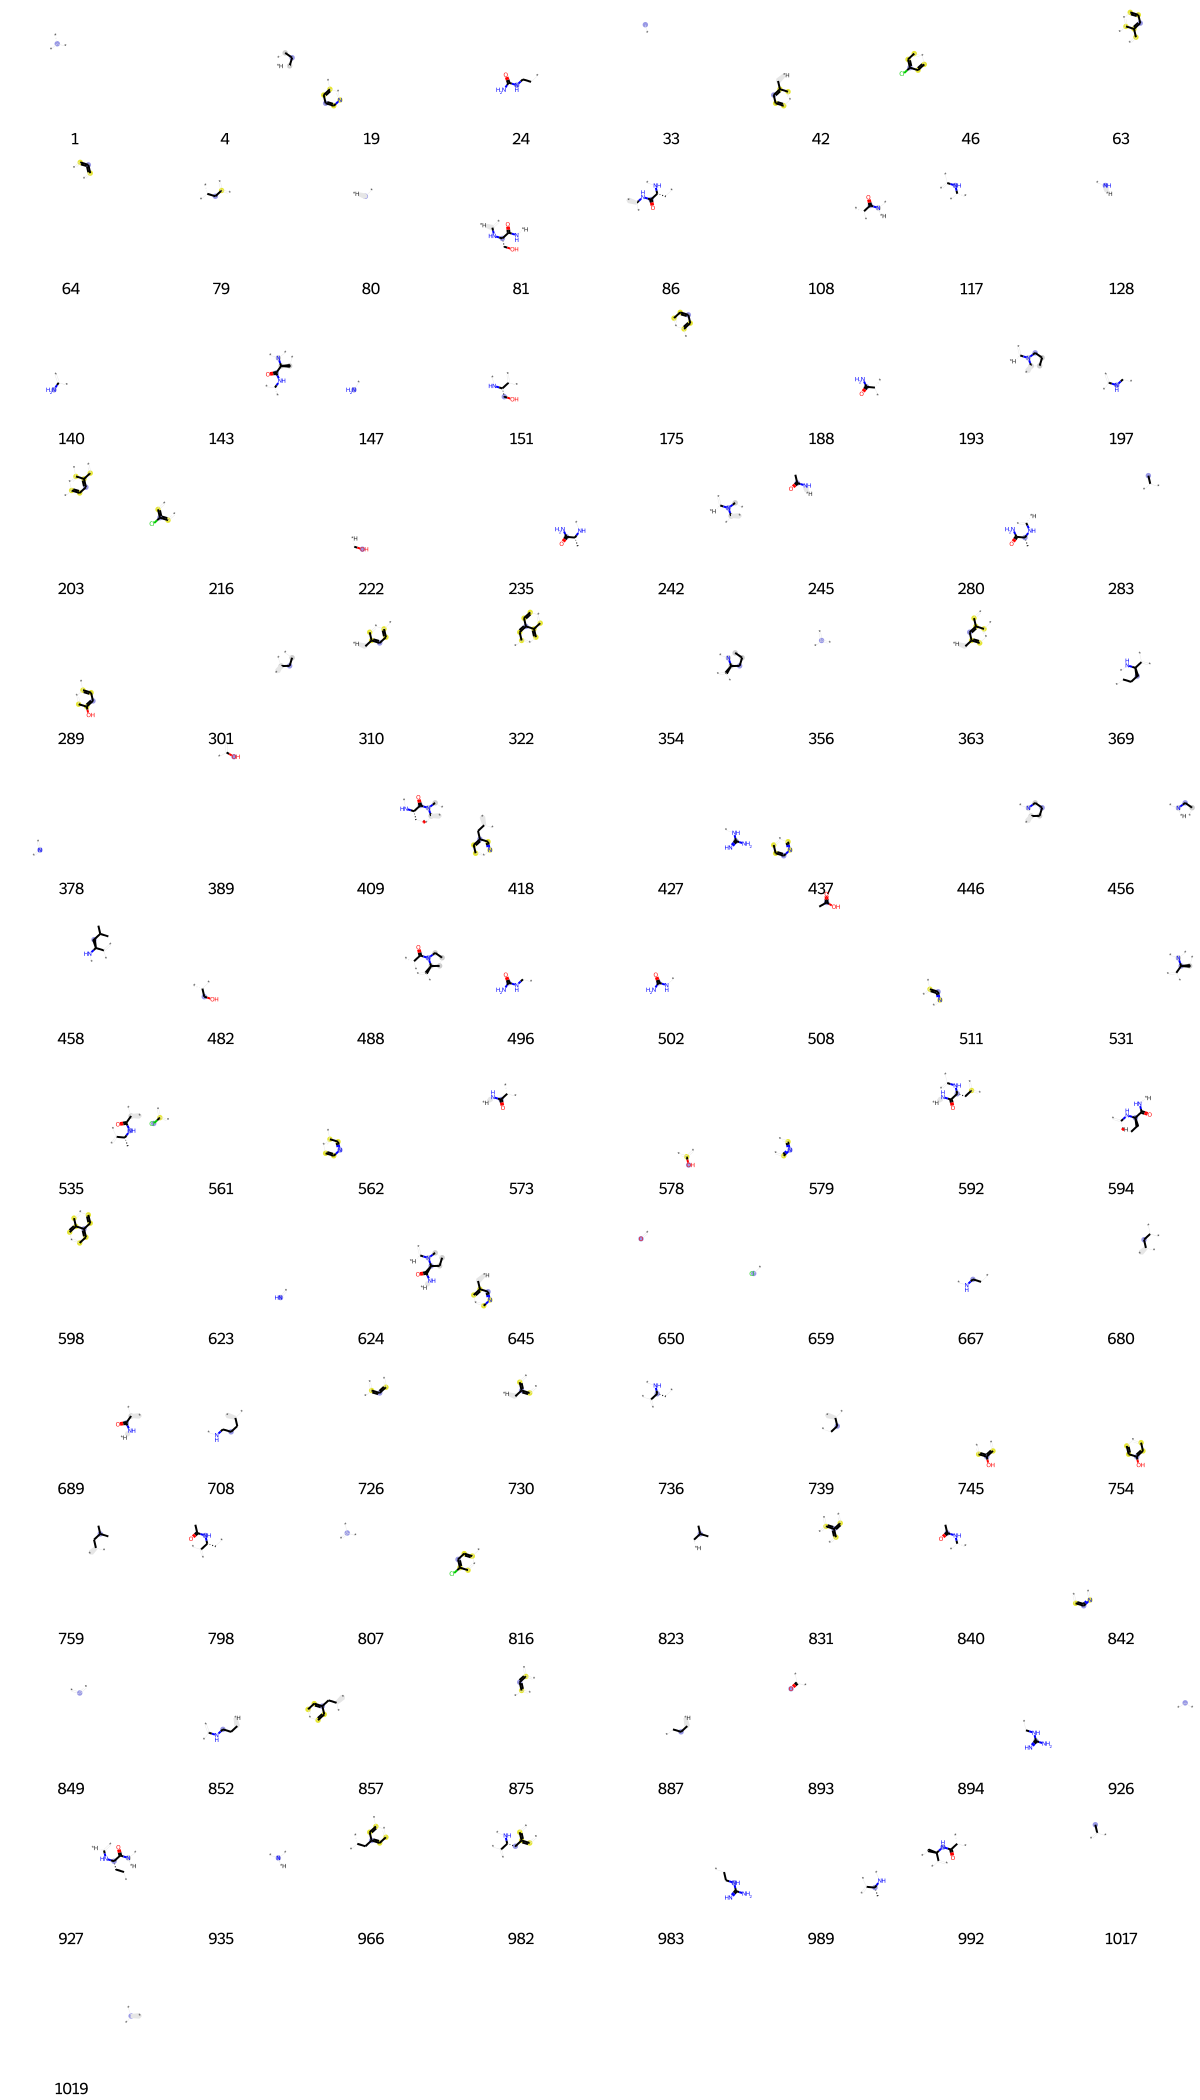

In [10037]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [10038]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 23,
 61,
 108,
 147,
 187,
 341,
 344,
 356,
 389,
 451,
 456,
 578,
 583,
 650,
 706,
 709,
 726,
 786,
 807,
 820,
 829,
 849,
 875,
 893,
 967,
 1022]

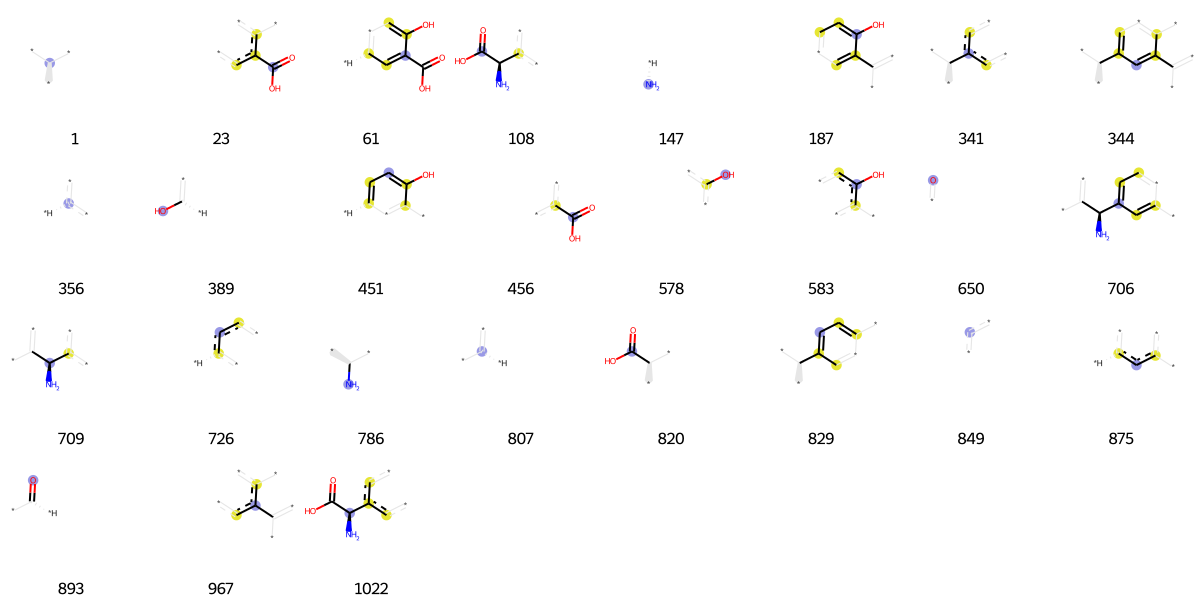

In [10039]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [10040]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[22,
 23,
 33,
 53,
 64,
 128,
 175,
 191,
 245,
 307,
 319,
 320,
 331,
 349,
 350,
 356,
 389,
 423,
 452,
 456,
 486,
 502,
 623,
 650,
 715,
 726,
 792,
 807,
 843,
 847,
 849,
 883,
 893,
 954,
 967,
 1017]

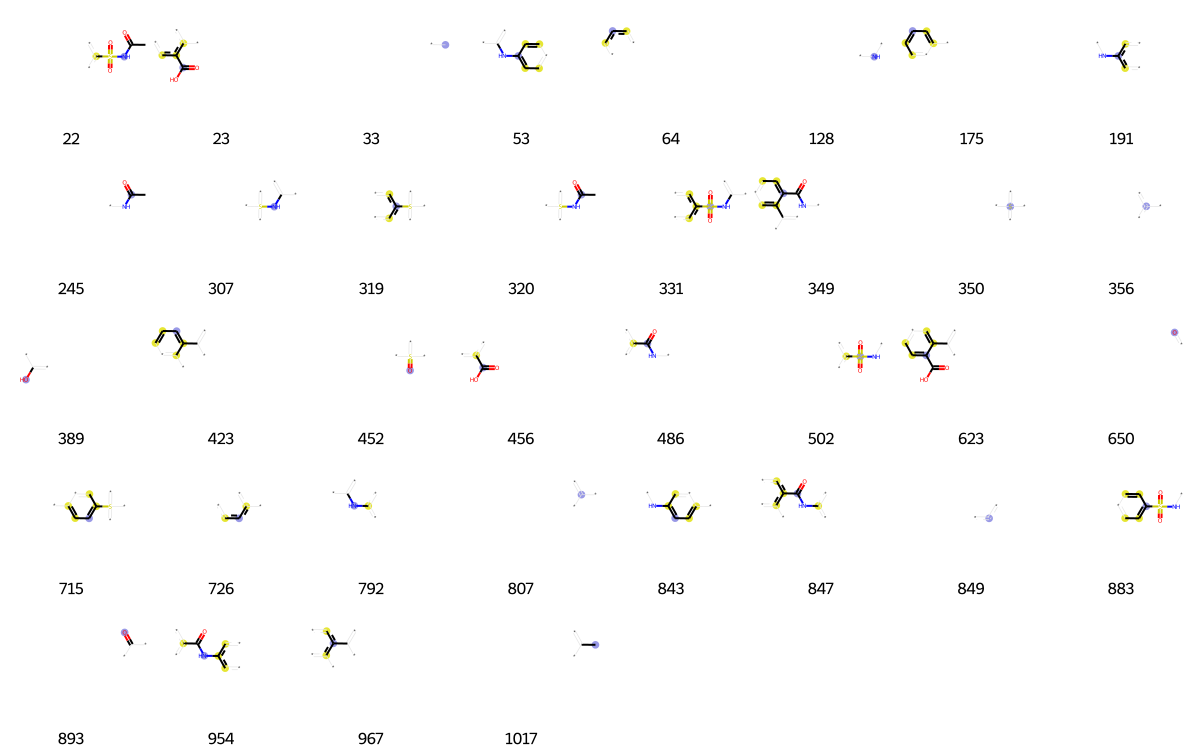

In [10041]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [10042]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[52,
 74,
 90,
 96,
 105,
 112,
 136,
 184,
 221,
 242,
 304,
 319,
 330,
 356,
 360,
 361,
 378,
 383,
 428,
 474,
 552,
 579,
 585,
 674,
 718,
 726,
 787,
 790,
 831,
 842,
 849,
 875,
 918,
 980]

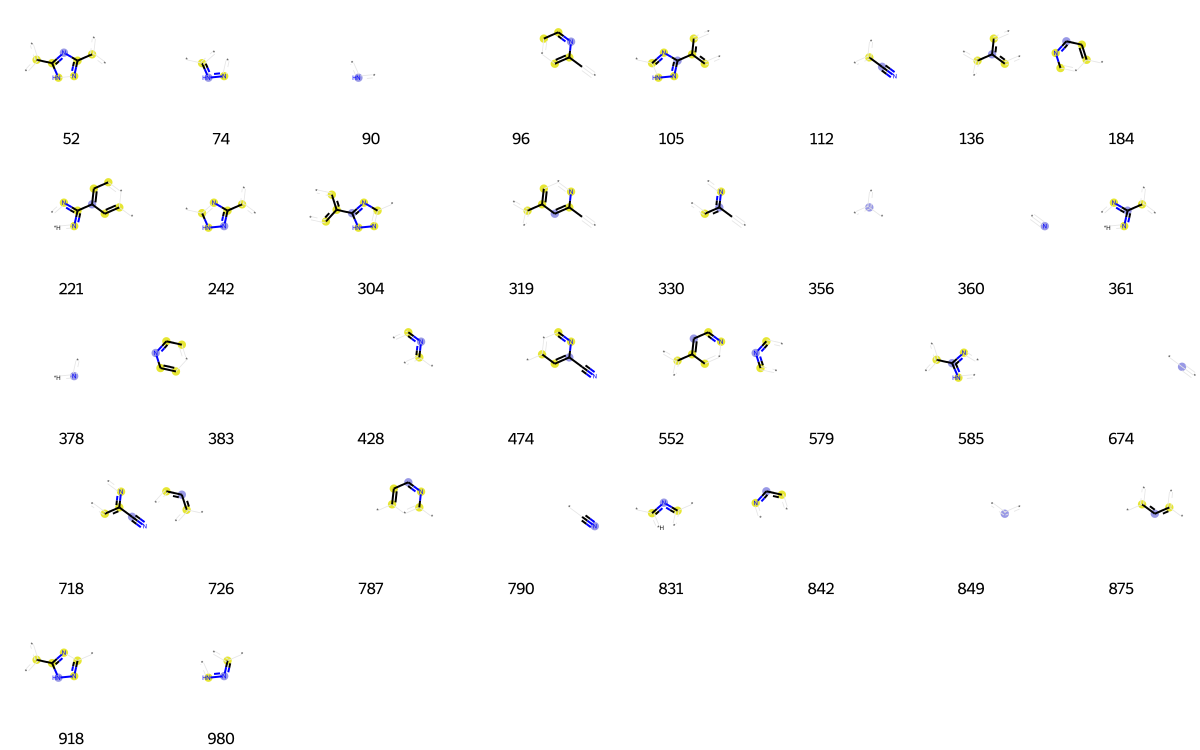

In [10043]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [10044]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 64,
 80,
 119,
 147,
 175,
 197,
 286,
 327,
 333,
 343,
 356,
 393,
 411,
 433,
 463,
 496,
 549,
 620,
 655,
 663,
 698,
 726,
 727,
 842,
 849,
 875,
 887,
 910,
 957,
 983]

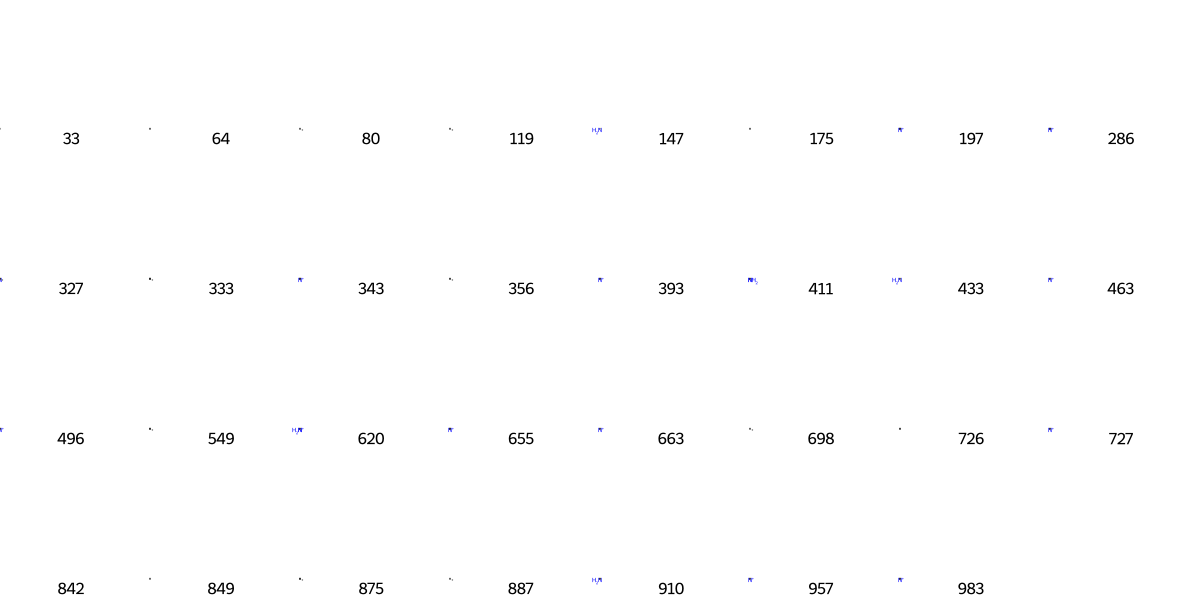

In [10045]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [10046]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[45,
 71,
 73,
 80,
 147,
 152,
 164,
 194,
 220,
 222,
 233,
 356,
 378,
 428,
 433,
 435,
 463,
 474,
 551,
 571,
 575,
 577,
 624,
 628,
 648,
 700,
 713,
 726,
 787,
 807,
 837,
 842,
 849,
 918,
 932,
 935,
 962,
 1019,
 1021]

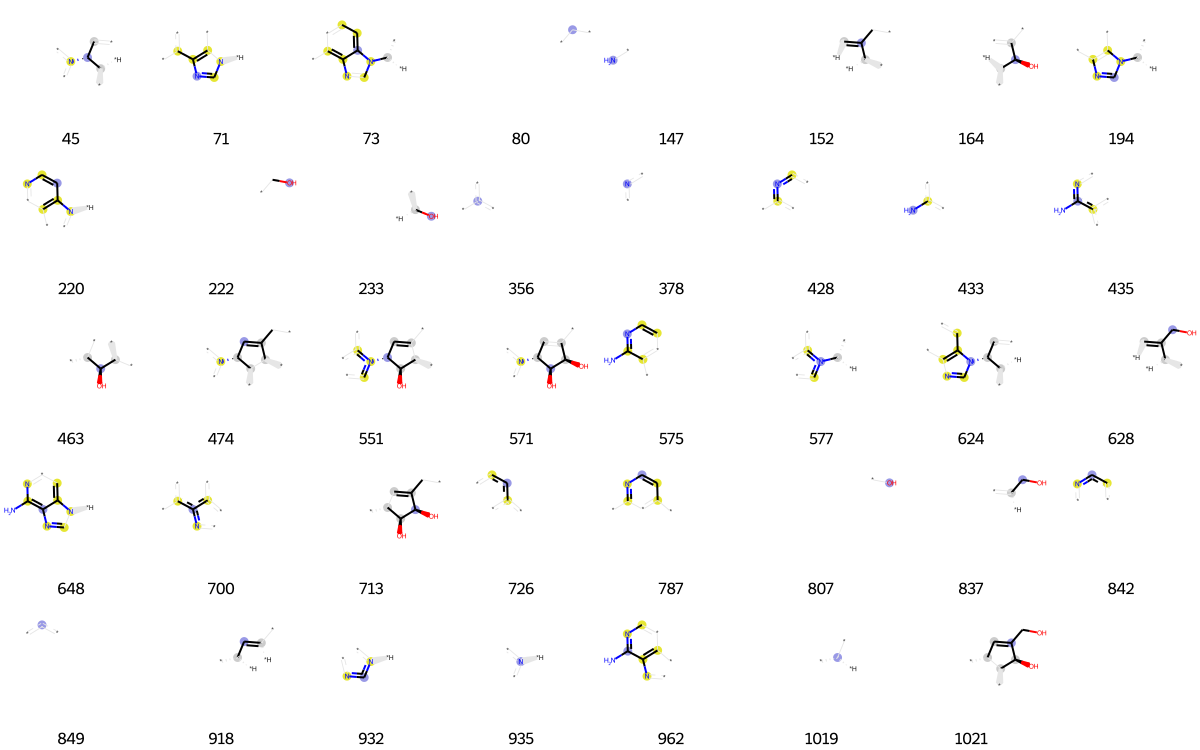

In [10047]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [10048]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[4,
 15,
 29,
 33,
 64,
 67,
 68,
 73,
 114,
 140,
 147,
 179,
 209,
 260,
 261,
 309,
 323,
 333,
 337,
 352,
 355,
 356,
 361,
 378,
 394,
 398,
 418,
 428,
 456,
 557,
 613,
 620,
 629,
 650,
 673,
 698,
 703,
 707,
 714,
 723,
 726,
 727,
 787,
 807,
 827,
 831,
 842,
 849,
 875,
 882,
 893,
 926,
 927,
 932,
 935,
 961,
 980,
 1017]

In [10049]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33,
 80,
 94,
 118,
 133,
 203,
 233,
 239,
 249,
 314,
 356,
 479,
 512,
 558,
 565,
 580,
 614,
 623,
 650,
 656,
 694,
 695,
 707,
 716,
 726,
 762,
 803,
 807,
 831,
 841,
 844,
 849,
 942,
 946,
 1010,
 1017]

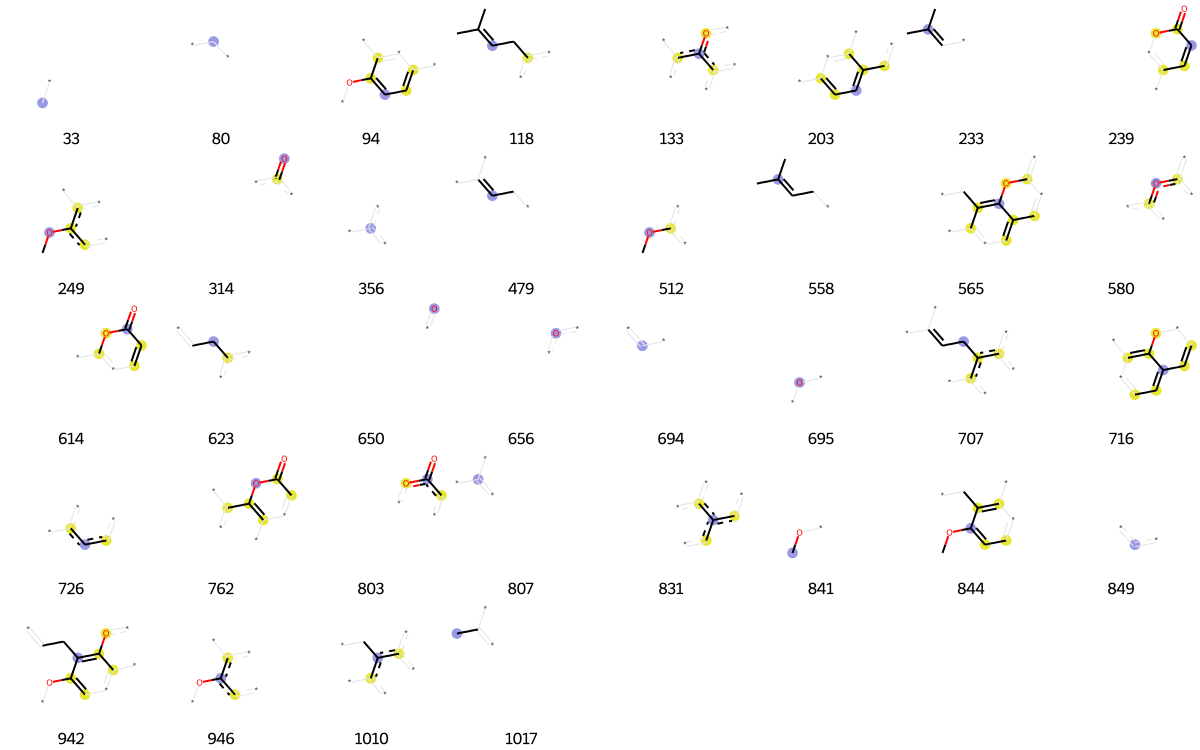

In [10050]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [10051]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[10,
 15,
 33,
 36,
 41,
 64,
 75,
 80,
 92,
 102,
 105,
 120,
 128,
 173,
 188,
 230,
 251,
 288,
 356,
 378,
 386,
 428,
 463,
 480,
 486,
 490,
 511,
 556,
 646,
 650,
 679,
 689,
 695,
 698,
 699,
 726,
 762,
 772,
 792,
 807,
 816,
 831,
 840,
 849,
 854,
 865,
 872,
 875,
 883,
 893,
 904,
 914,
 926,
 946,
 967,
 969,
 971,
 1019]

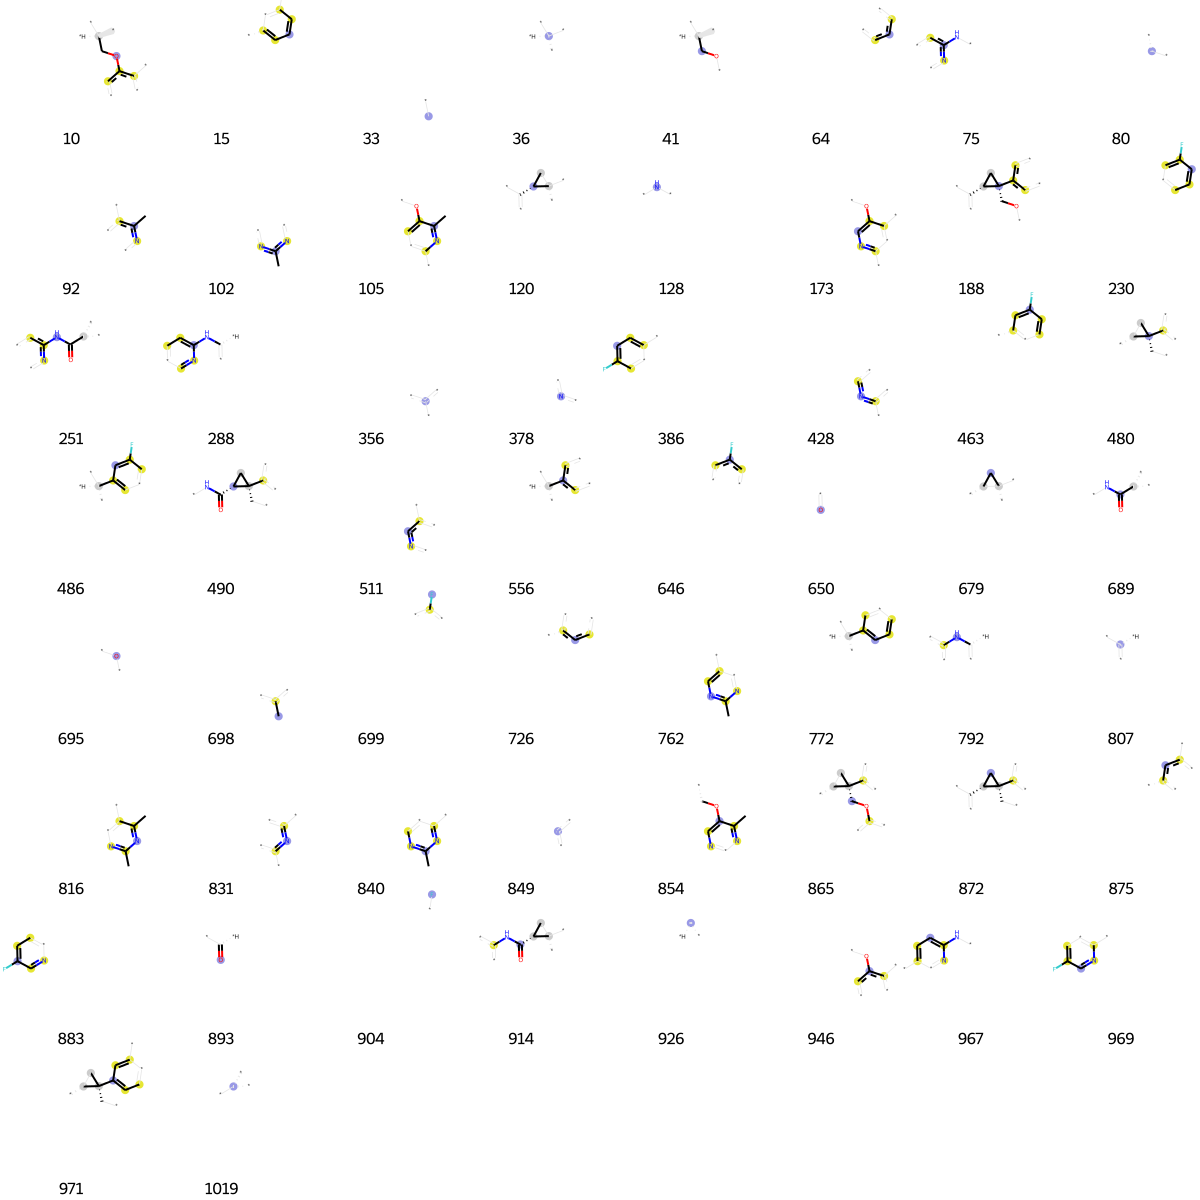

In [10052]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [10053]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[80,
 90,
 121,
 144,
 147,
 219,
 356,
 378,
 428,
 575,
 625,
 713,
 724,
 734,
 774,
 803,
 816,
 849,
 855,
 931,
 981]

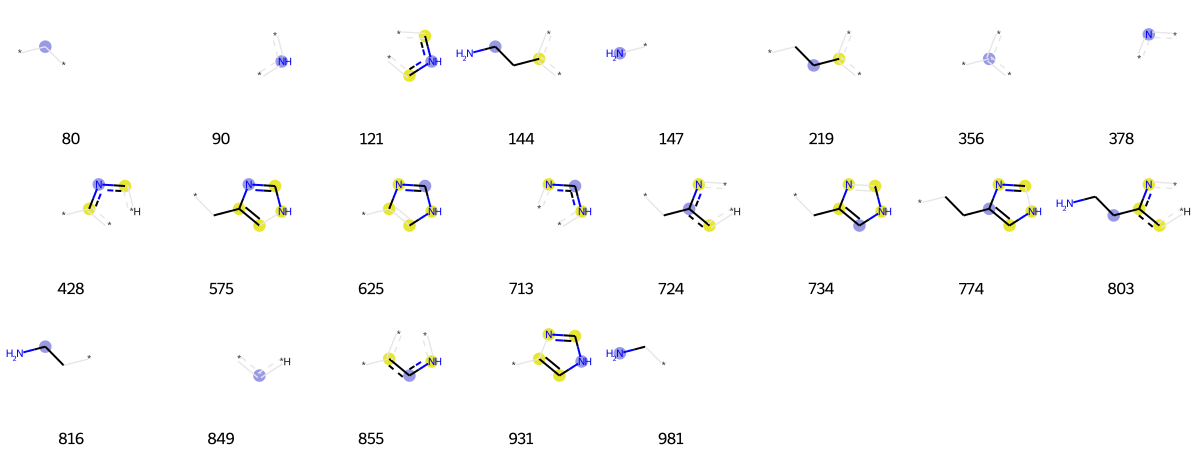

In [10054]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [10055]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33, 49, 80, 87, 114, 294, 295, 389, 392, 588, 650, 807, 861, 893, 953]

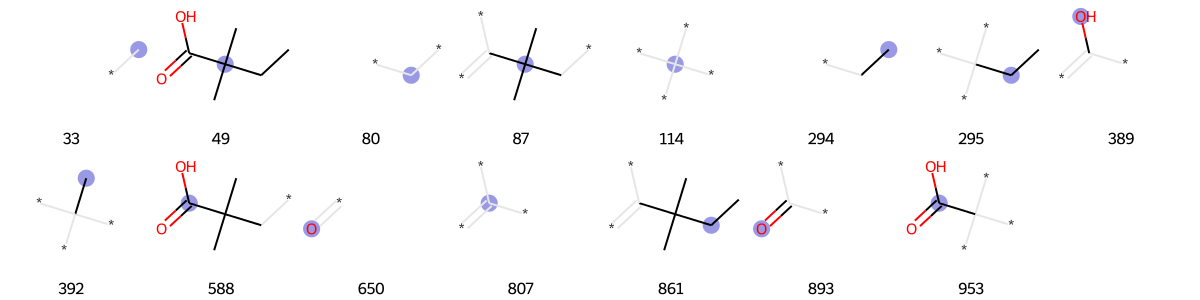

In [10056]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [10057]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 13,
 33,
 64,
 80,
 139,
 175,
 249,
 274,
 314,
 333,
 352,
 356,
 405,
 428,
 452,
 494,
 549,
 598,
 650,
 652,
 693,
 695,
 723,
 726,
 746,
 787,
 815,
 844,
 849,
 875,
 881,
 901,
 927,
 946,
 957,
 984]

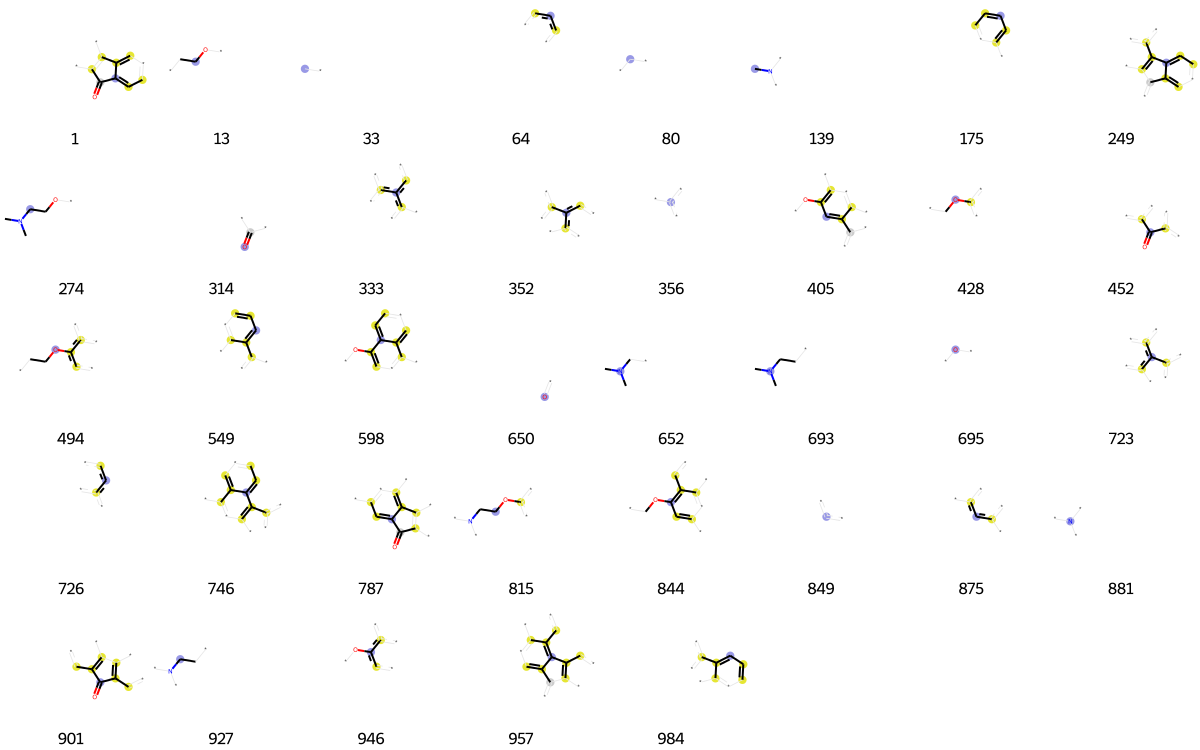

In [10058]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [10059]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[8,
 15,
 64,
 80,
 140,
 147,
 197,
 198,
 309,
 354,
 356,
 378,
 394,
 464,
 650,
 699,
 726,
 737,
 741,
 747,
 759,
 781,
 807,
 816,
 849,
 855,
 861,
 893,
 904,
 935,
 970,
 986,
 1010]

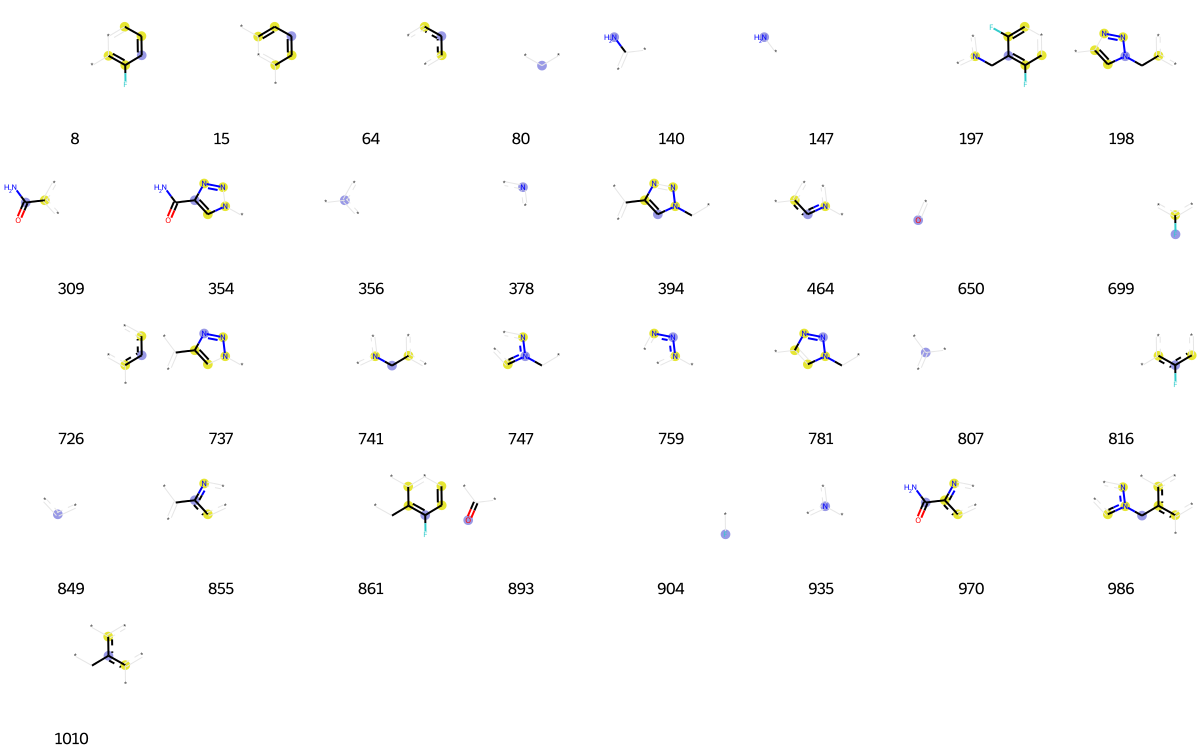

In [10060]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [10061]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[14,
 33,
 121,
 136,
 184,
 190,
 202,
 207,
 212,
 222,
 233,
 279,
 331,
 352,
 356,
 378,
 381,
 407,
 456,
 484,
 495,
 511,
 561,
 562,
 578,
 579,
 625,
 687,
 699,
 726,
 801,
 807,
 816,
 842,
 849,
 875,
 881,
 896,
 904,
 926,
 927,
 935]

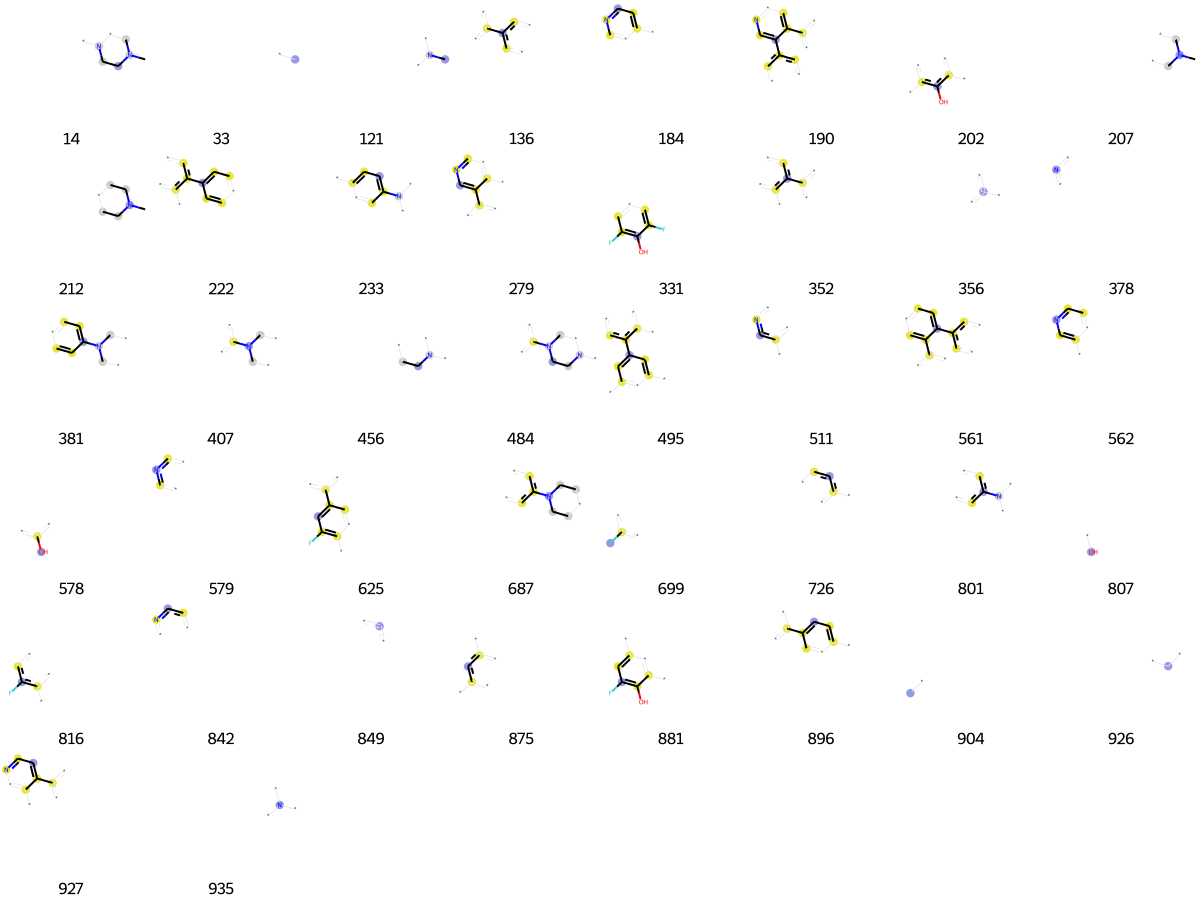

In [10062]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [10063]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[21,
 27,
 52,
 57,
 66,
 80,
 90,
 147,
 219,
 310,
 356,
 362,
 379,
 386,
 540,
 625,
 646,
 688,
 694,
 699,
 726,
 730,
 807,
 849,
 883,
 904,
 981]

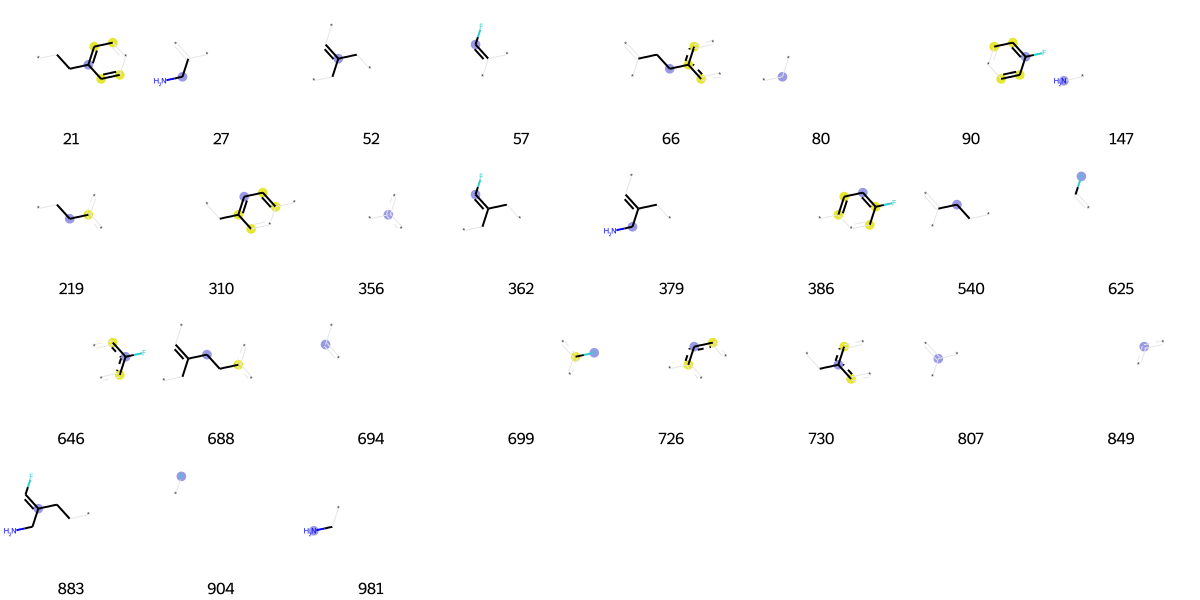

In [10064]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [10065]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[17,
 33,
 37,
 53,
 64,
 80,
 83,
 102,
 112,
 128,
 130,
 136,
 168,
 191,
 197,
 232,
 278,
 285,
 294,
 312,
 356,
 361,
 378,
 407,
 417,
 421,
 422,
 424,
 428,
 448,
 456,
 460,
 523,
 552,
 560,
 565,
 600,
 650,
 656,
 676,
 684,
 702,
 709,
 714,
 726,
 734,
 786,
 792,
 807,
 825,
 831,
 842,
 843,
 849,
 893,
 896,
 899,
 922,
 924,
 926,
 935,
 950,
 965,
 966,
 1005,
 1019]

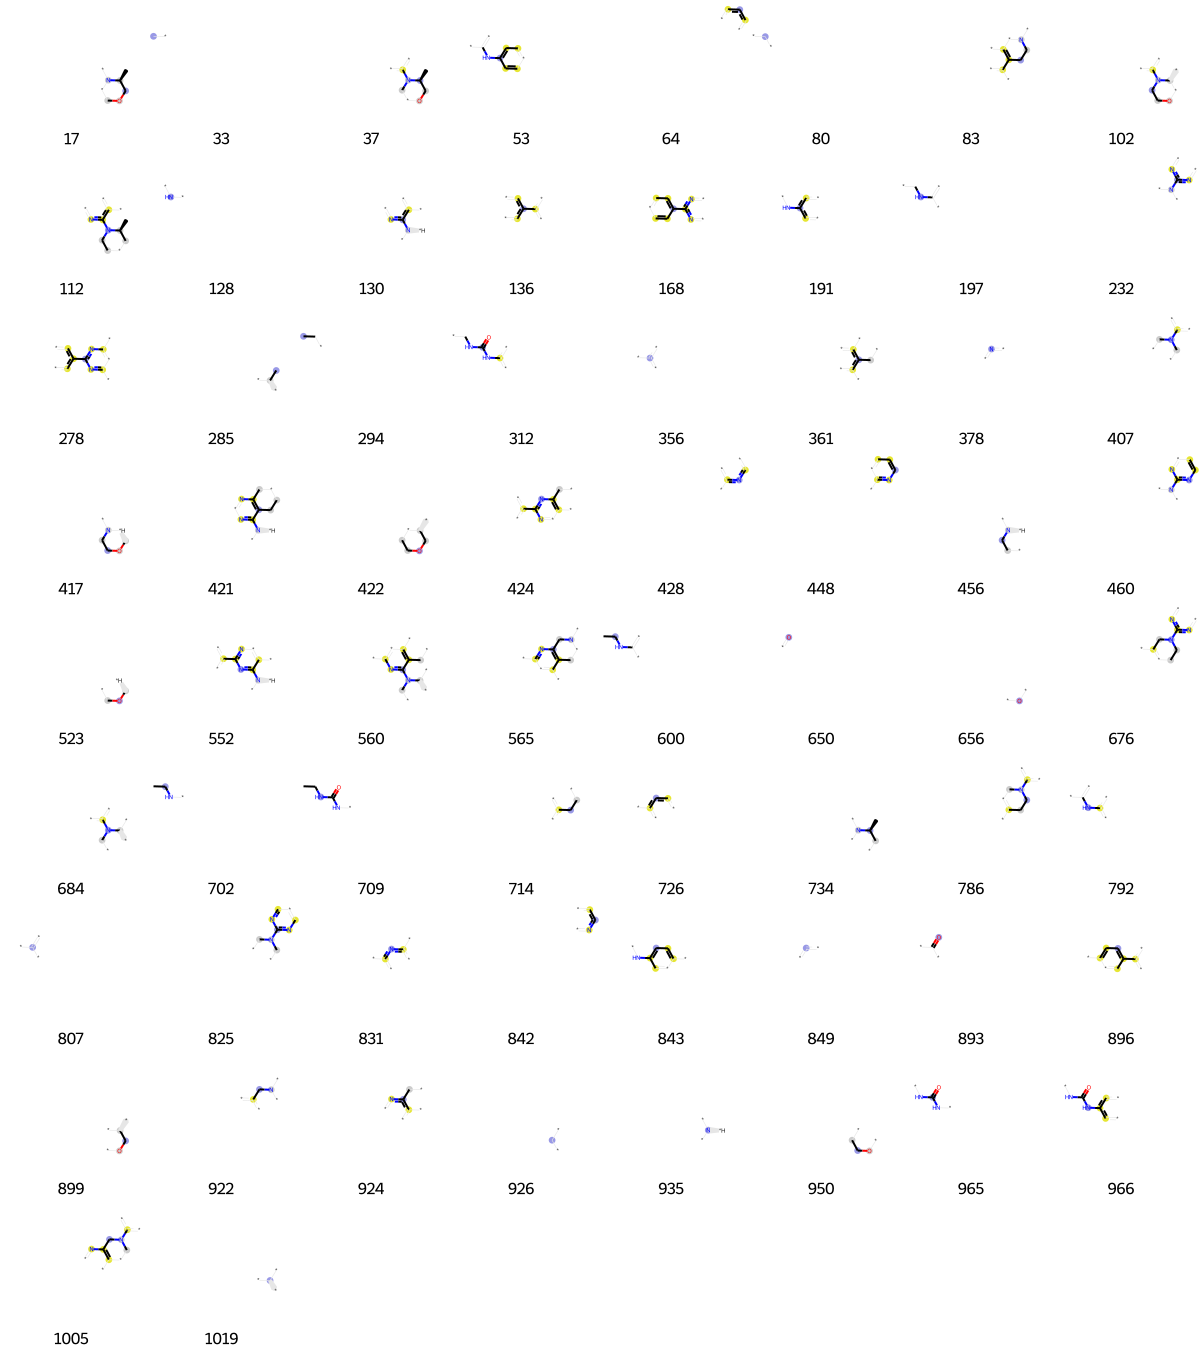

In [10066]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [10067]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 45,
 64,
 73,
 80,
 114,
 140,
 147,
 162,
 175,
 202,
 221,
 249,
 251,
 262,
 309,
 325,
 356,
 378,
 396,
 400,
 419,
 425,
 428,
 429,
 503,
 512,
 546,
 564,
 573,
 577,
 596,
 650,
 675,
 680,
 695,
 701,
 704,
 726,
 745,
 780,
 781,
 804,
 807,
 809,
 818,
 832,
 841,
 848,
 849,
 875,
 893,
 904,
 915,
 932,
 935,
 946,
 1000]

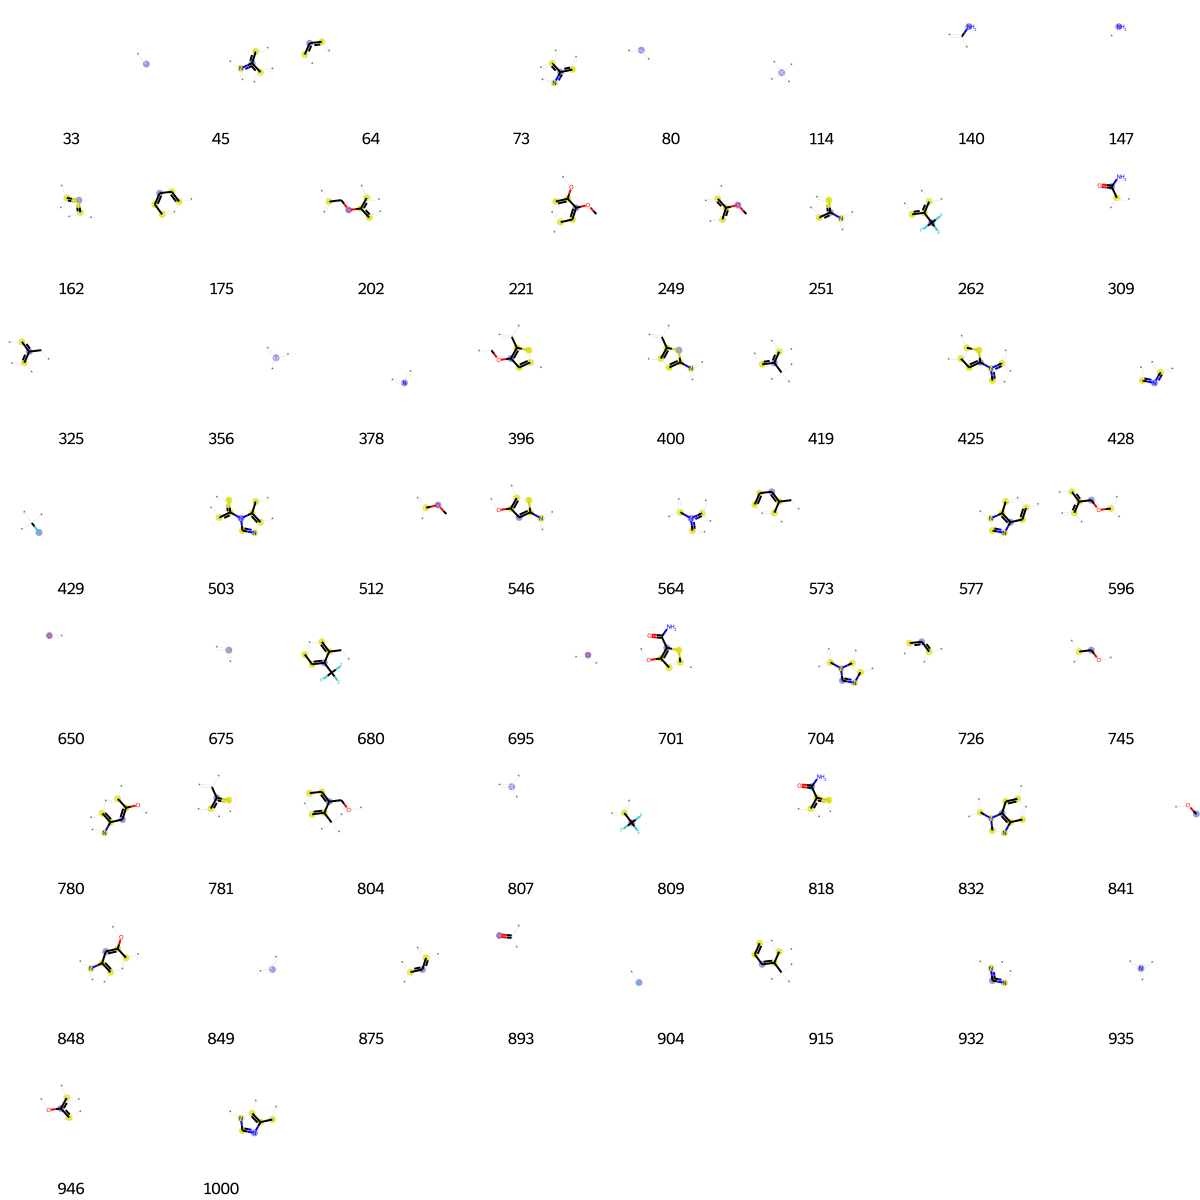

In [10068]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [10069]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 22,
 33,
 36,
 74,
 80,
 90,
 98,
 99,
 102,
 114,
 121,
 130,
 155,
 157,
 162,
 171,
 194,
 200,
 234,
 243,
 250,
 283,
 295,
 314,
 352,
 356,
 378,
 406,
 429,
 460,
 480,
 504,
 549,
 558,
 564,
 586,
 591,
 601,
 602,
 620,
 650,
 656,
 675,
 683,
 692,
 698,
 702,
 703,
 708,
 756,
 771,
 807,
 809,
 851,
 853,
 862,
 893,
 904,
 906,
 911,
 926,
 935,
 960,
 977,
 980,
 1010,
 1019]

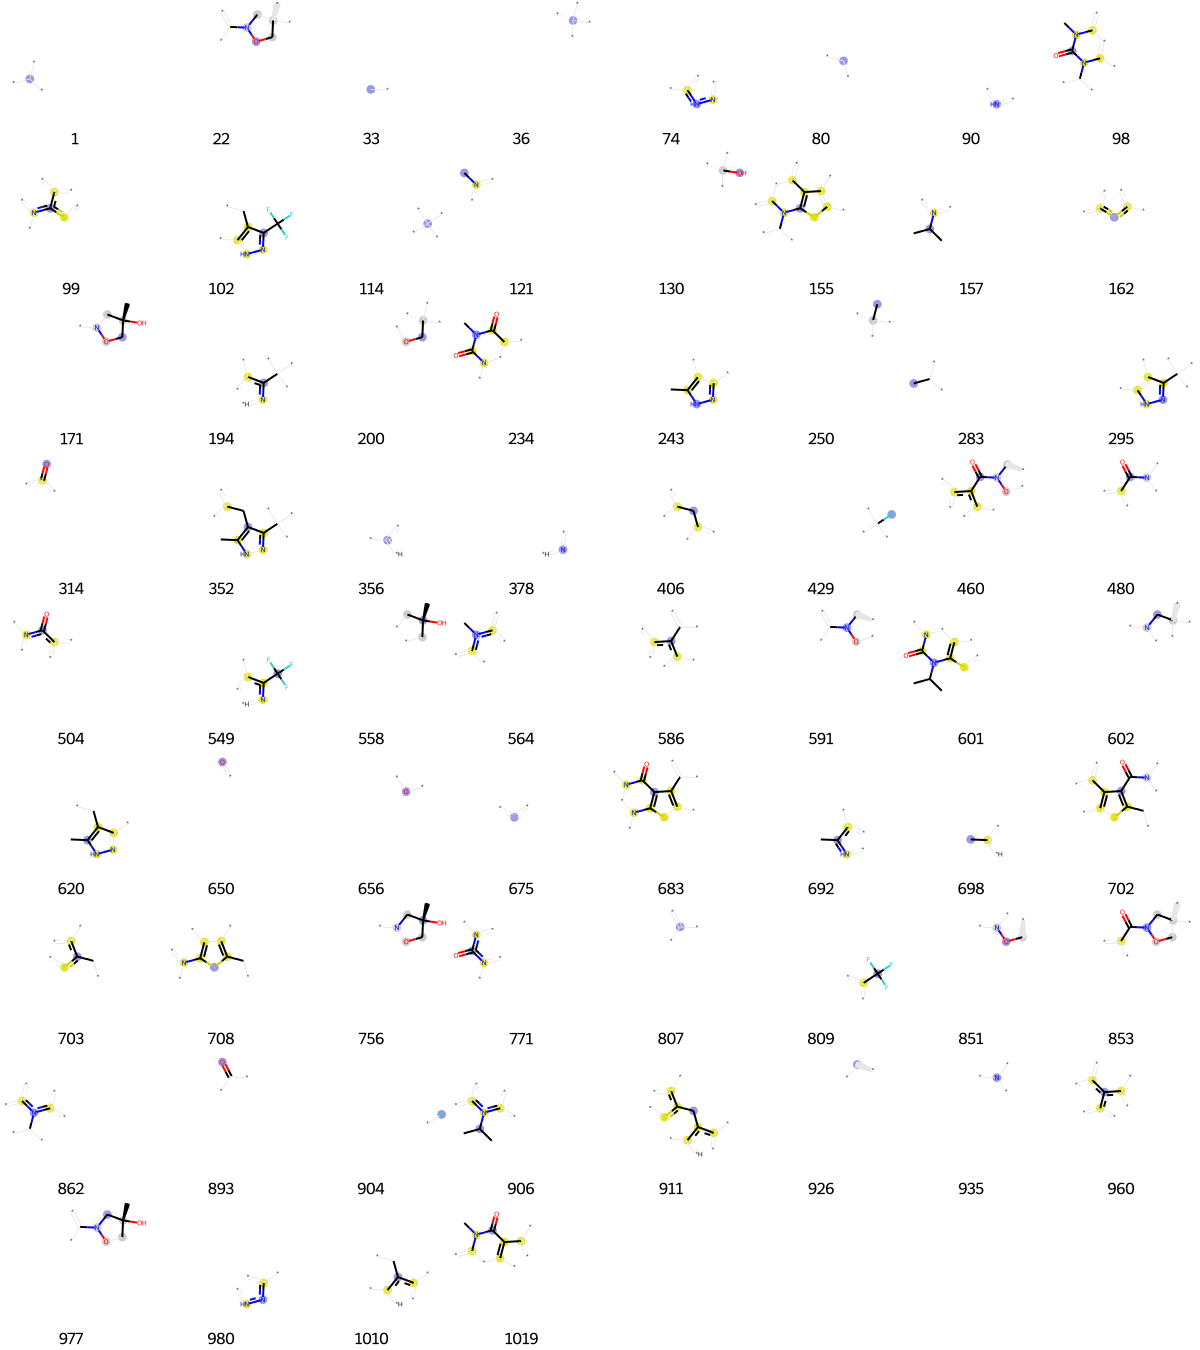

In [10070]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [10071]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[2,
 4,
 33,
 63,
 72,
 80,
 106,
 114,
 123,
 134,
 139,
 166,
 213,
 214,
 255,
 287,
 301,
 310,
 350,
 356,
 361,
 362,
 389,
 421,
 452,
 456,
 470,
 507,
 526,
 536,
 613,
 626,
 650,
 673,
 699,
 726,
 730,
 741,
 758,
 779,
 783,
 797,
 807,
 815,
 849,
 881,
 890,
 893,
 904,
 919,
 926,
 960,
 976,
 1019,
 1021]

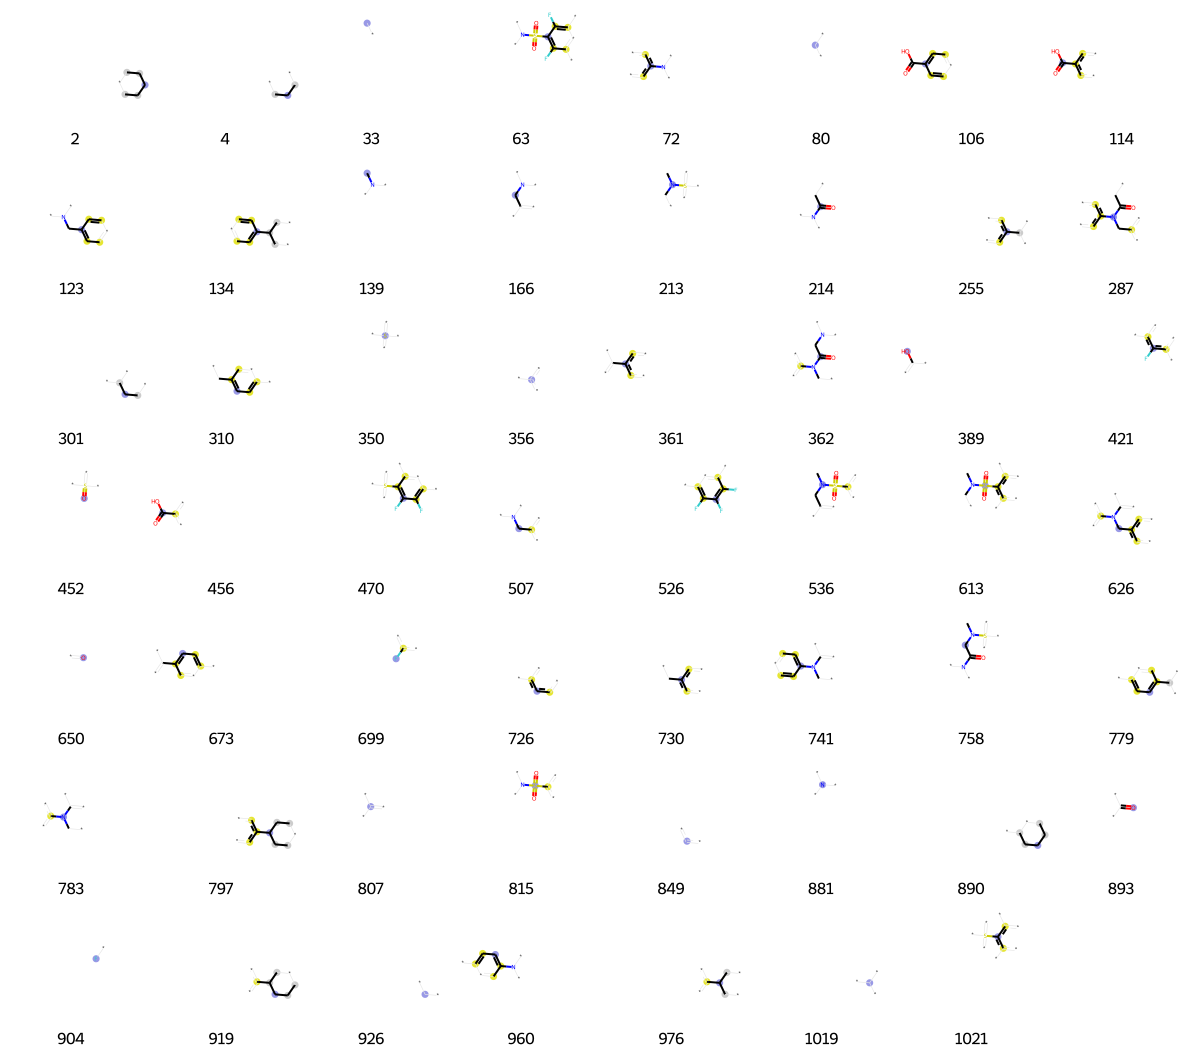

In [10072]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [10073]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[2,
 4,
 10,
 13,
 33,
 80,
 102,
 121,
 294,
 322,
 356,
 361,
 398,
 427,
 428,
 456,
 458,
 514,
 533,
 540,
 591,
 594,
 650,
 669,
 673,
 695,
 718,
 726,
 767,
 794,
 807,
 849,
 873,
 887,
 893,
 926,
 935,
 974]

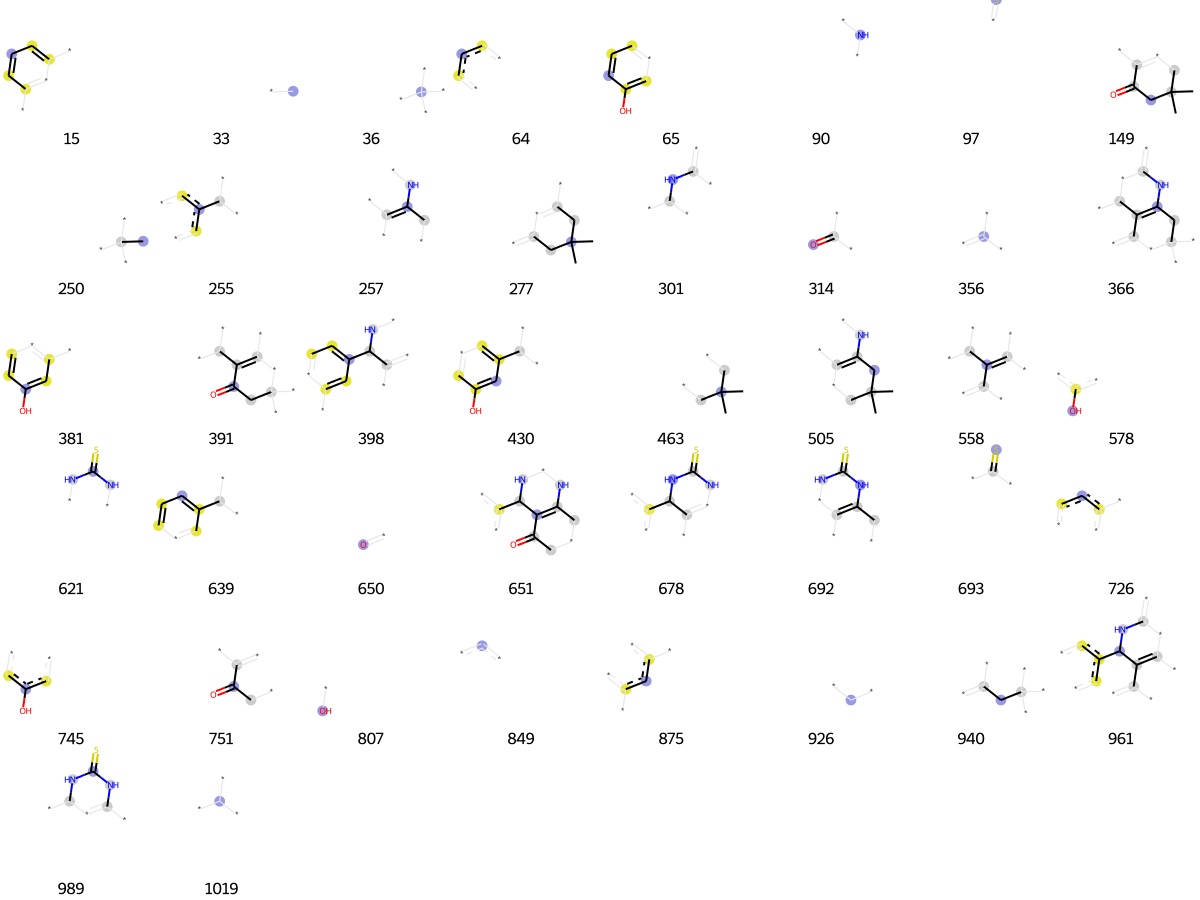

In [10074]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [10075]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[4,
 17,
 73,
 80,
 90,
 93,
 224,
 233,
 288,
 301,
 304,
 305,
 314,
 333,
 338,
 351,
 356,
 366,
 378,
 408,
 423,
 428,
 431,
 449,
 483,
 504,
 561,
 575,
 607,
 630,
 650,
 659,
 661,
 673,
 728,
 741,
 742,
 767,
 807,
 833,
 842,
 849,
 875,
 888,
 893,
 926,
 932,
 935,
 1000,
 1002,
 1004,
 1015,
 1019]

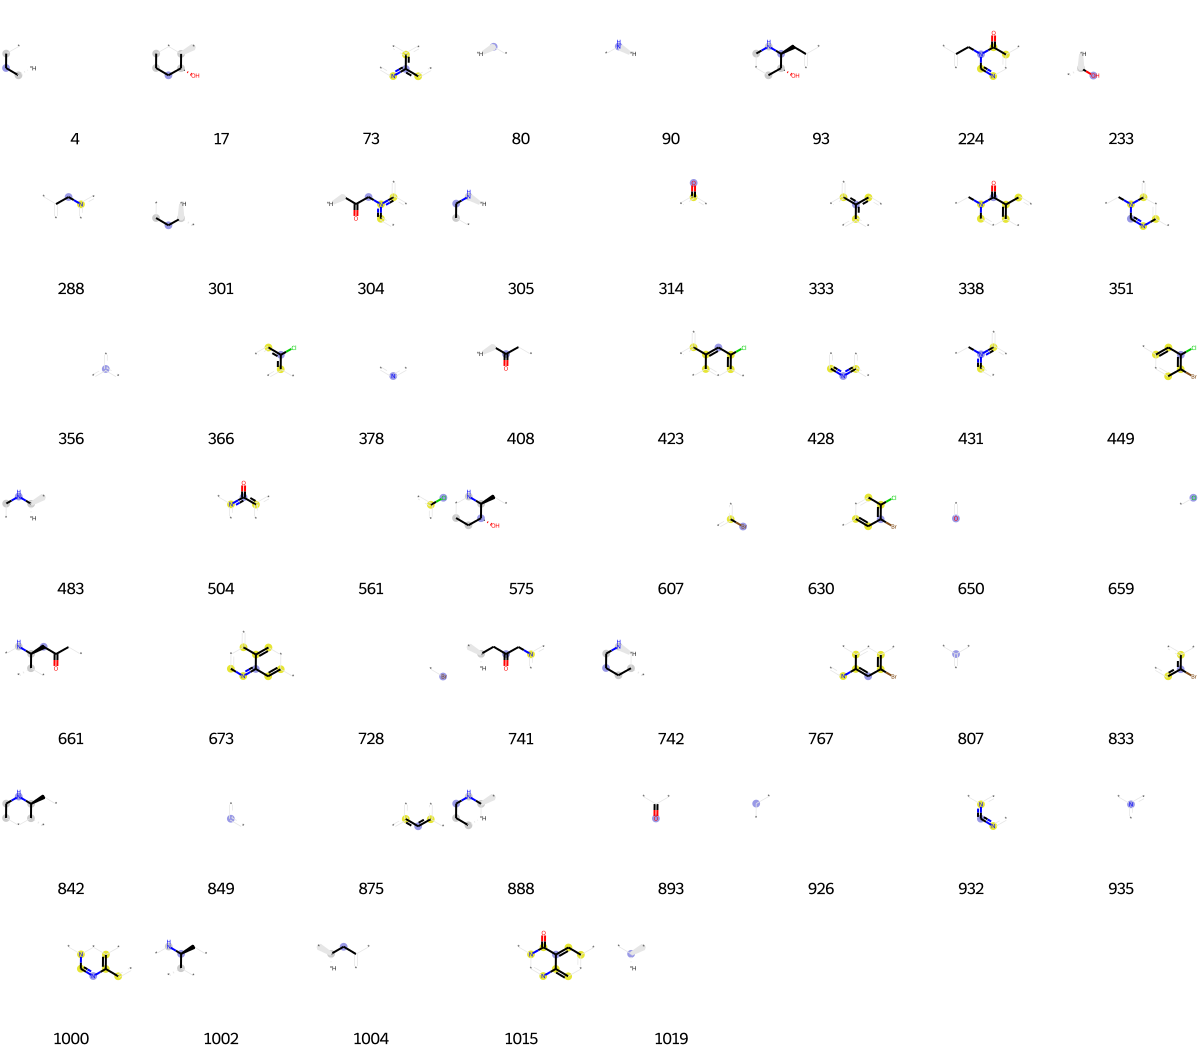

In [10076]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [10077]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[3,
 33,
 36,
 40,
 105,
 118,
 138,
 212,
 233,
 249,
 250,
 289,
 301,
 356,
 408,
 453,
 455,
 512,
 519,
 562,
 578,
 583,
 614,
 622,
 636,
 695,
 713,
 714,
 728,
 735,
 760,
 769,
 807,
 823,
 826,
 841,
 849,
 875,
 887,
 917,
 926,
 927,
 946,
 1019]

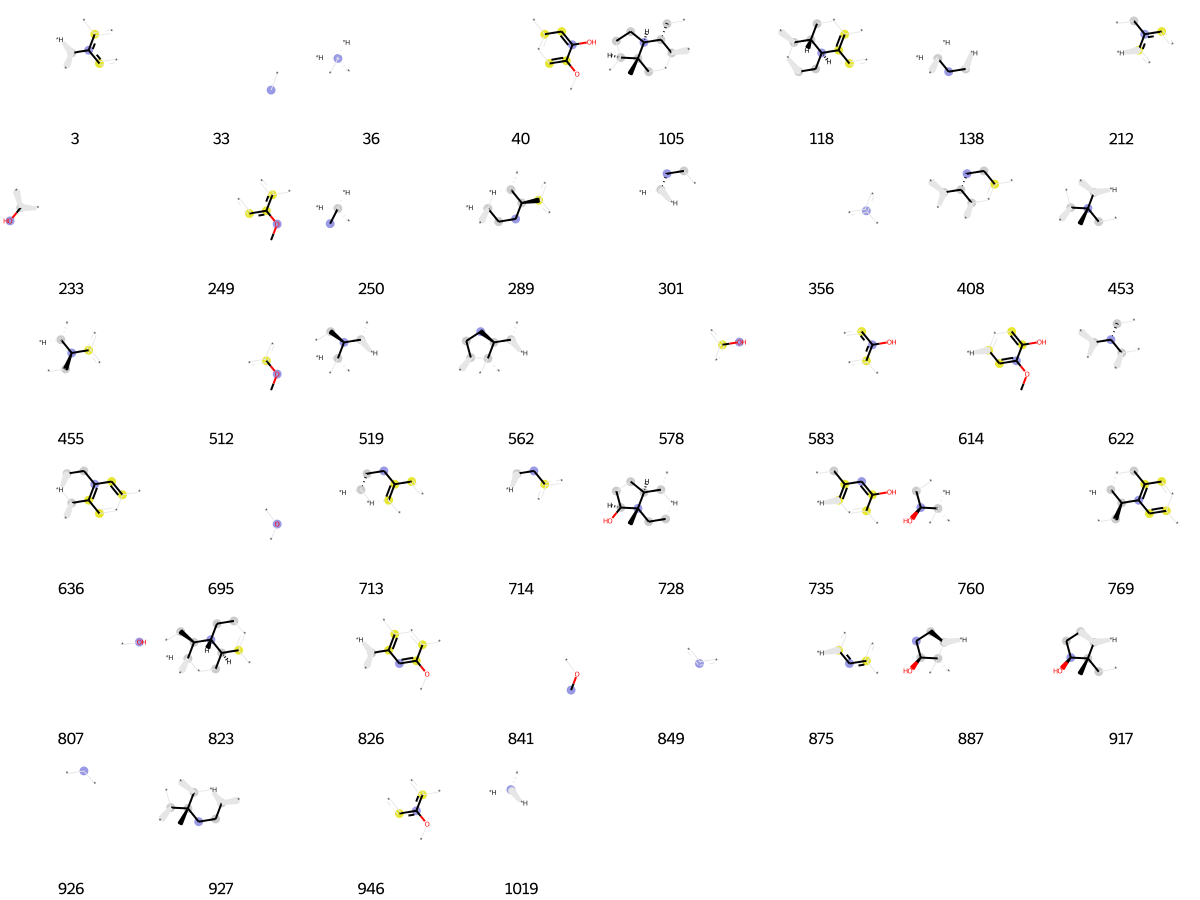

In [10078]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [10079]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 21,
 33,
 80,
 128,
 219,
 220,
 227,
 283,
 289,
 310,
 341,
 348,
 356,
 483,
 507,
 529,
 578,
 635,
 667,
 726,
 730,
 745,
 754,
 782,
 803,
 807,
 829,
 849,
 886]

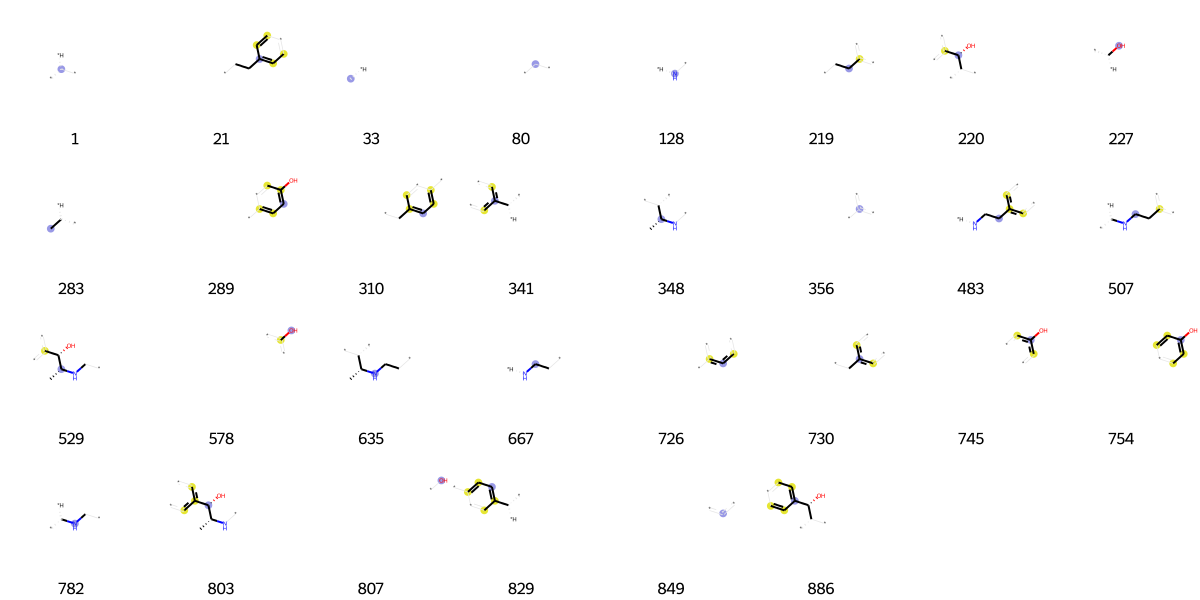

In [10080]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [10081]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[20,
 33,
 56,
 73,
 75,
 128,
 160,
 200,
 221,
 240,
 248,
 249,
 272,
 322,
 333,
 346,
 356,
 363,
 366,
 374,
 378,
 412,
 428,
 430,
 504,
 512,
 518,
 561,
 573,
 593,
 613,
 624,
 647,
 650,
 656,
 659,
 673,
 695,
 698,
 718,
 726,
 780,
 787,
 792,
 807,
 832,
 841,
 842,
 849,
 875,
 888,
 893,
 946,
 965]

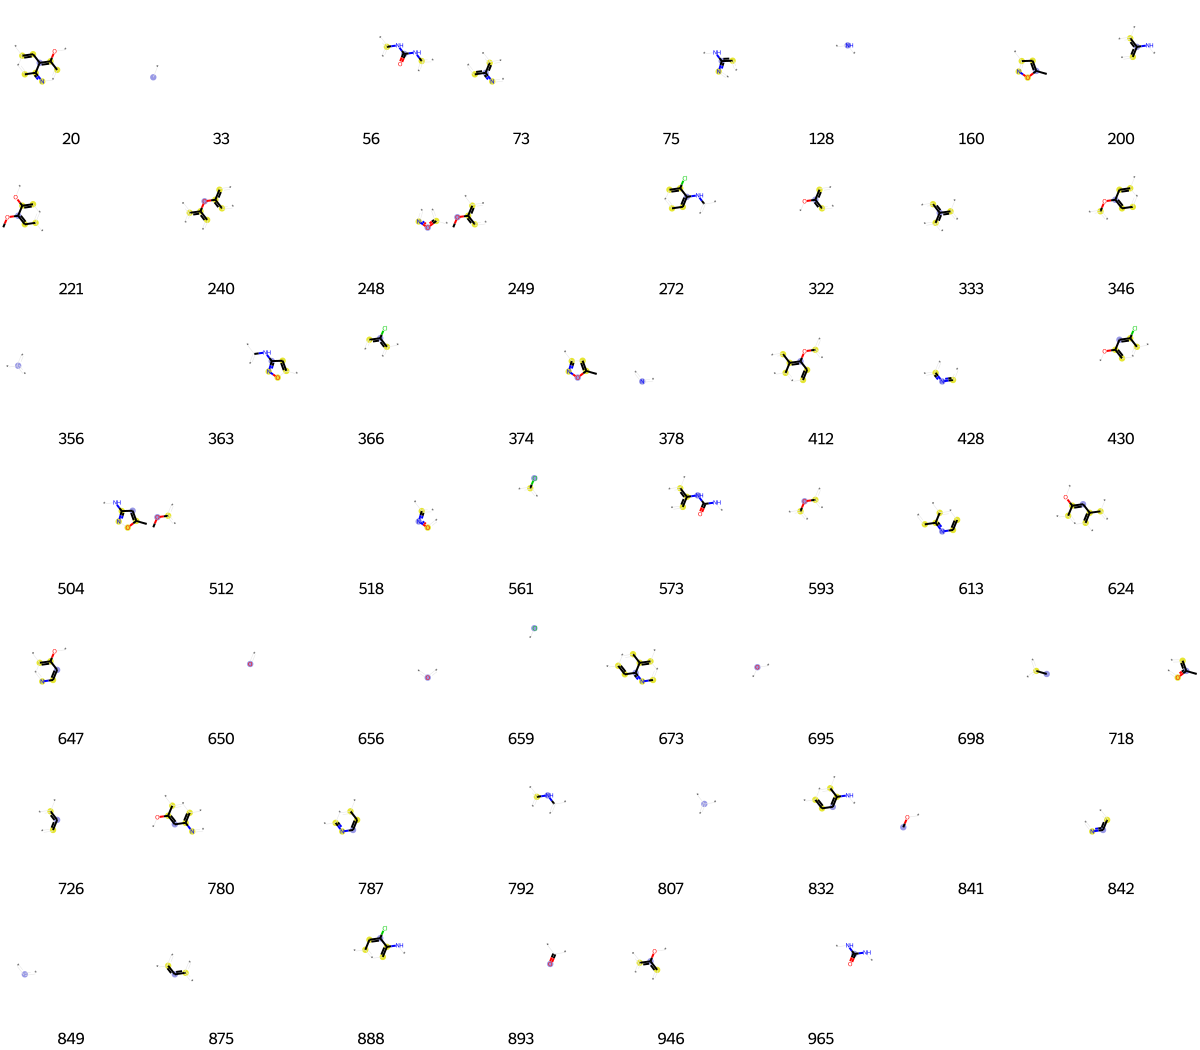

In [10082]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [10083]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 62,
 77,
 80,
 125,
 147,
 192,
 222,
 313,
 314,
 315,
 316,
 356,
 378,
 424,
 431,
 433,
 445,
 482,
 485,
 486,
 560,
 605,
 620,
 650,
 655,
 695,
 726,
 758,
 790,
 807,
 814,
 831,
 849,
 863,
 869,
 898,
 908,
 935,
 1018]

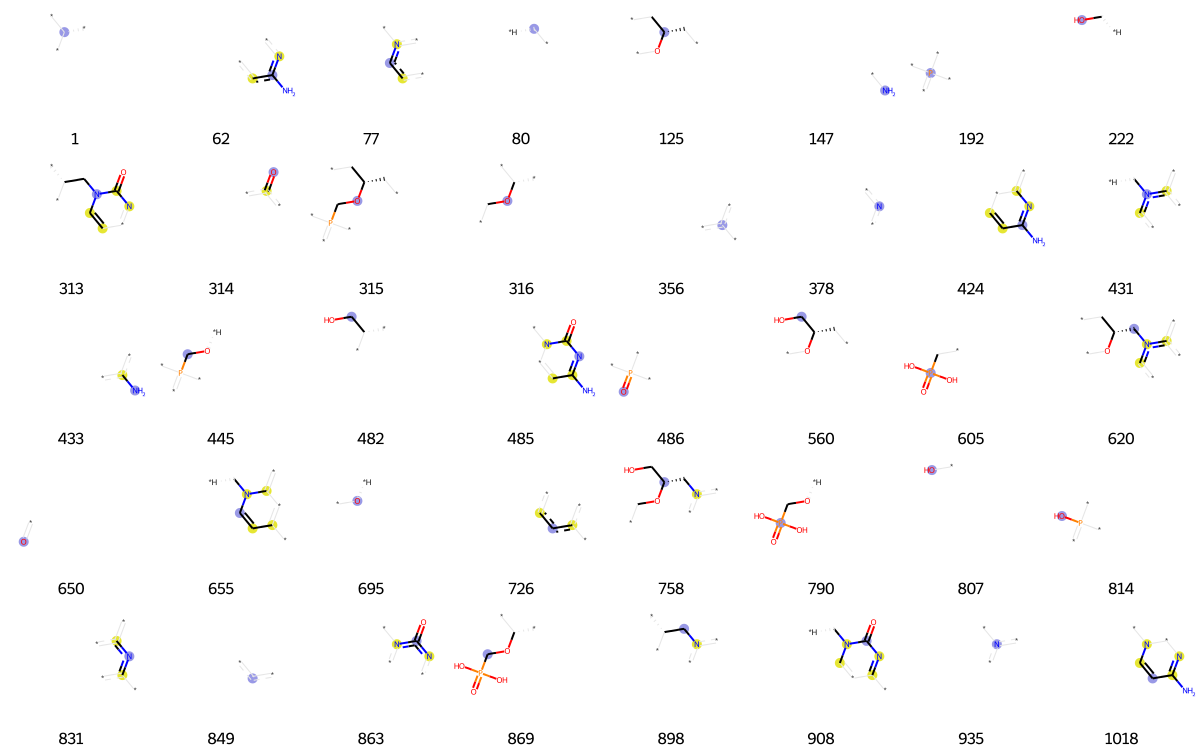

In [10084]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [10085]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[33,
 77,
 80,
 90,
 94,
 115,
 128,
 147,
 152,
 184,
 191,
 214,
 233,
 236,
 237,
 265,
 267,
 270,
 294,
 314,
 356,
 378,
 380,
 386,
 425,
 428,
 433,
 435,
 486,
 504,
 561,
 564,
 575,
 576,
 582,
 586,
 593,
 646,
 647,
 650,
 654,
 659,
 694,
 695,
 699,
 726,
 787,
 792,
 801,
 807,
 816,
 842,
 843,
 849,
 875,
 893,
 904,
 921,
 929,
 935,
 946,
 954,
 1009,
 1011]

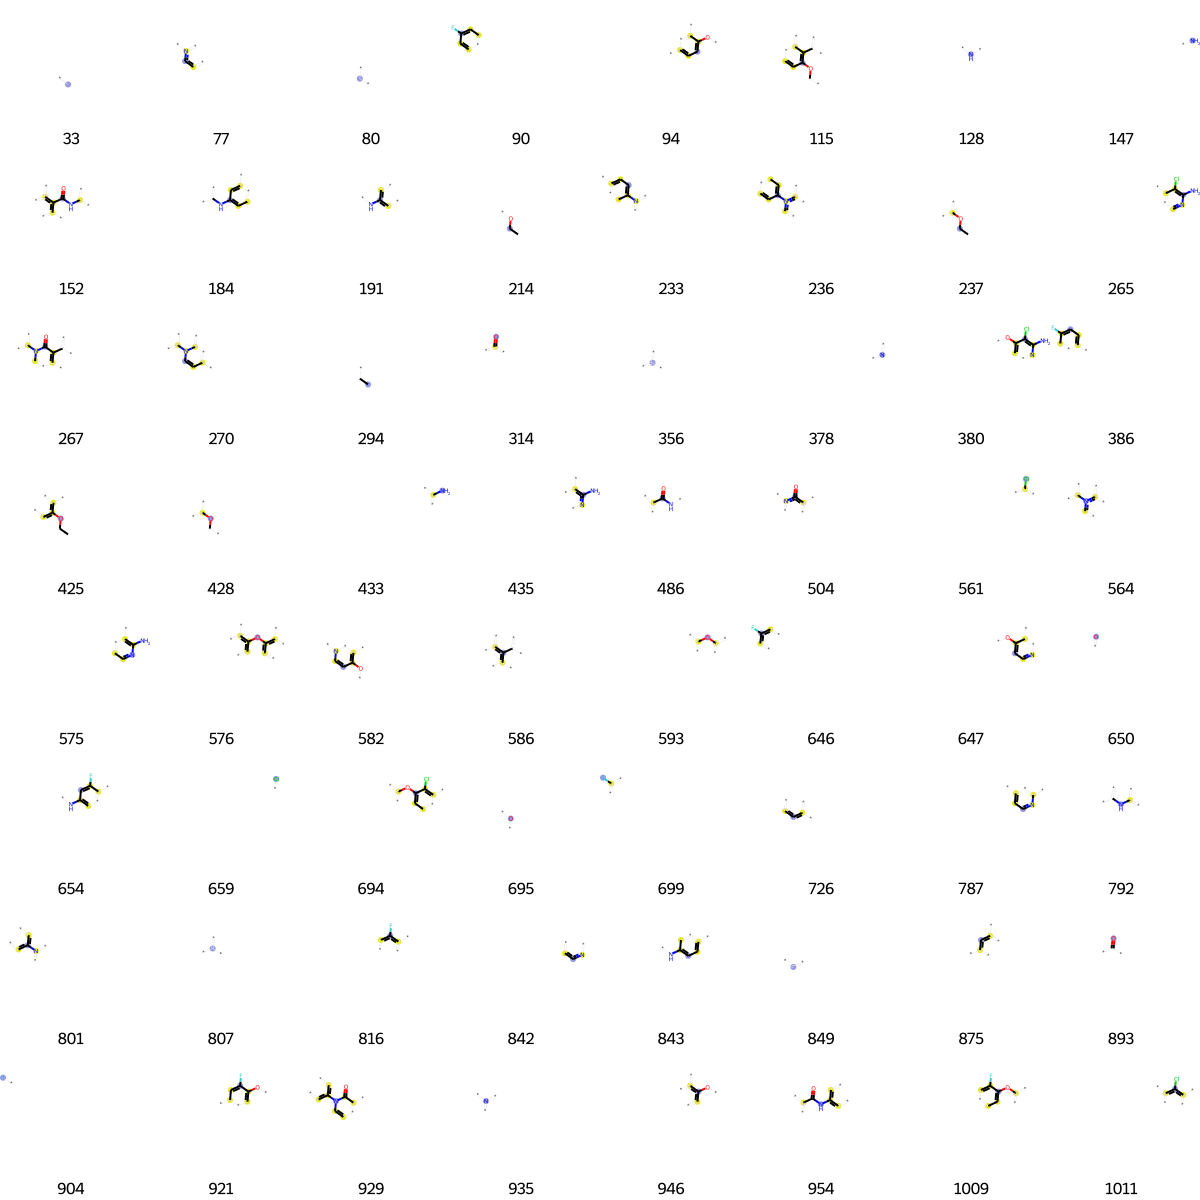

In [10086]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [10087]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 8,
 10,
 13,
 33,
 80,
 102,
 106,
 114,
 128,
 197,
 265,
 283,
 322,
 341,
 356,
 361,
 389,
 428,
 456,
 486,
 490,
 561,
 598,
 641,
 650,
 667,
 673,
 695,
 718,
 726,
 766,
 780,
 807,
 829,
 849,
 893]

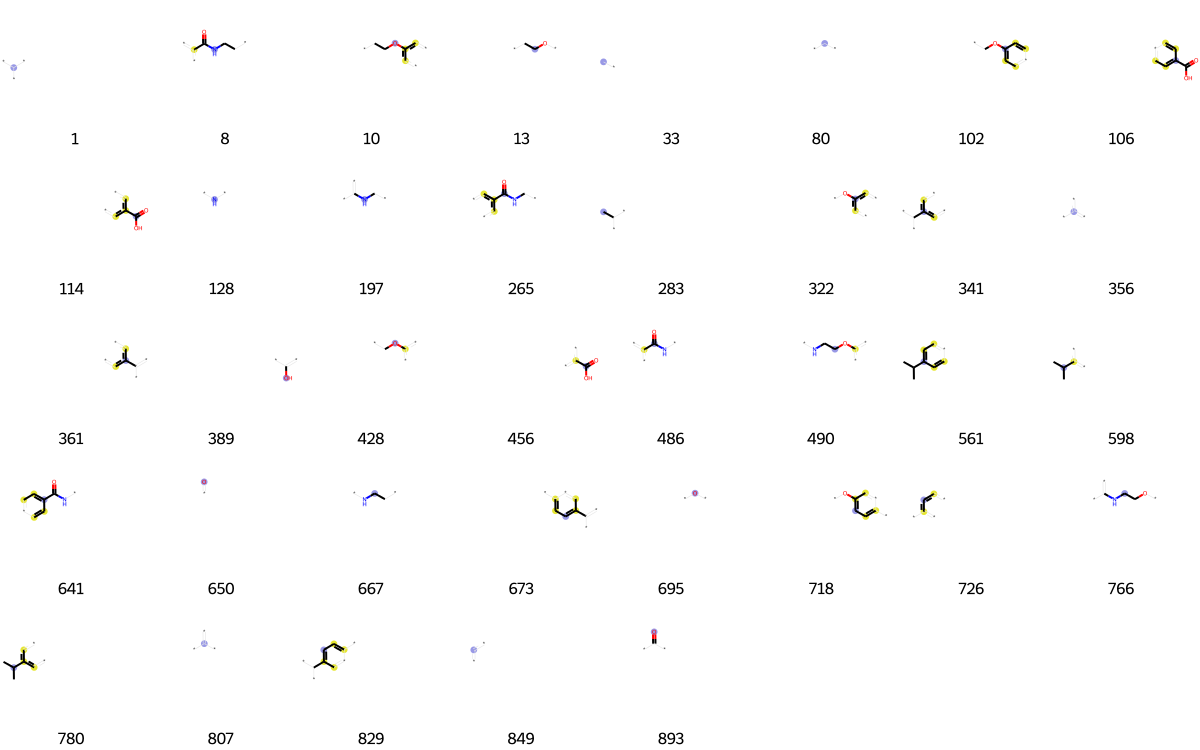

In [10088]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [10089]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[31,
 33,
 55,
 96,
 126,
 136,
 173,
 249,
 252,
 264,
 295,
 333,
 350,
 356,
 367,
 389,
 422,
 432,
 468,
 476,
 488,
 512,
 602,
 642,
 650,
 652,
 694,
 695,
 698,
 718,
 807,
 835,
 841,
 849,
 875,
 893,
 919,
 933,
 946,
 976,
 1017]

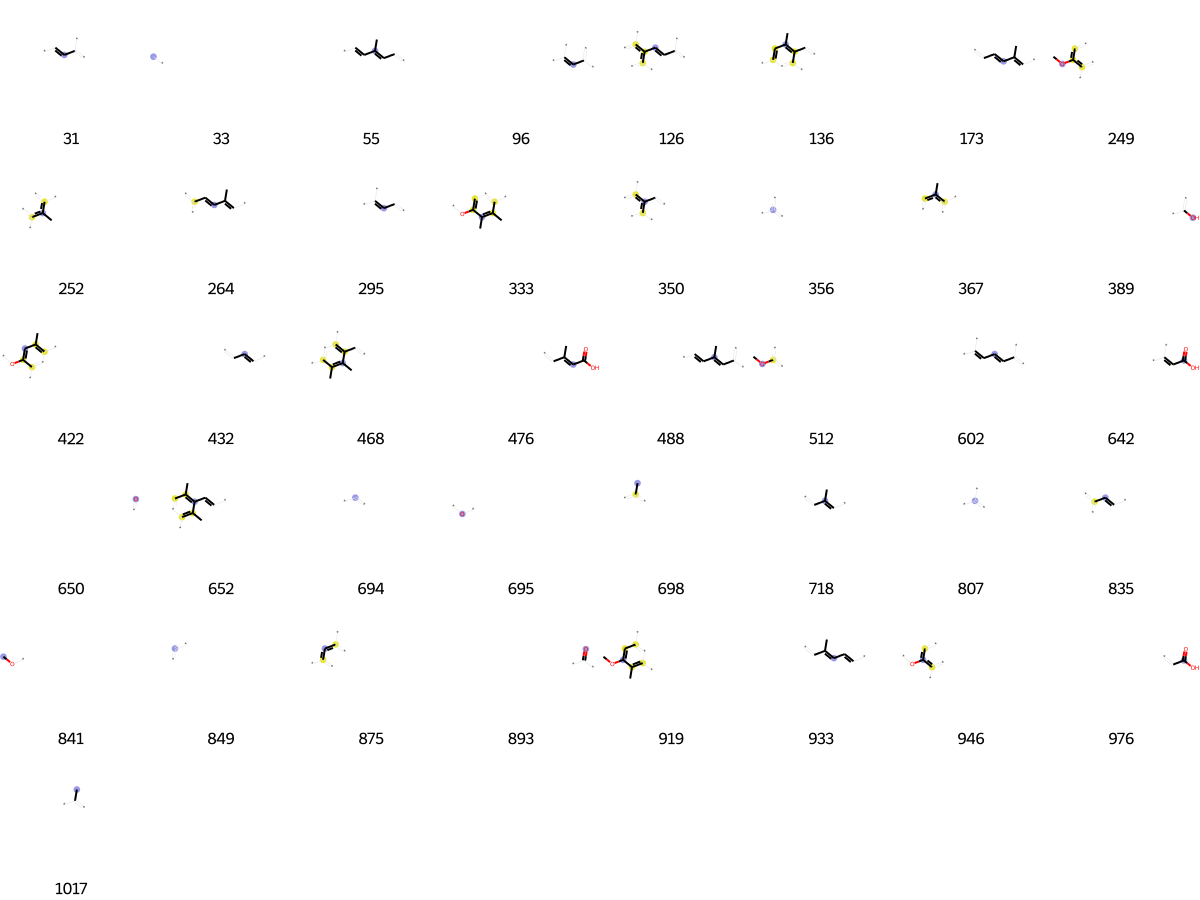

In [10090]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [10091]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 34,
 36,
 64,
 66,
 121,
 175,
 250,
 255,
 268,
 314,
 356,
 389,
 556,
 623,
 650,
 726,
 772,
 798,
 818,
 849,
 920,
 926,
 935,
 940,
 942,
 987]

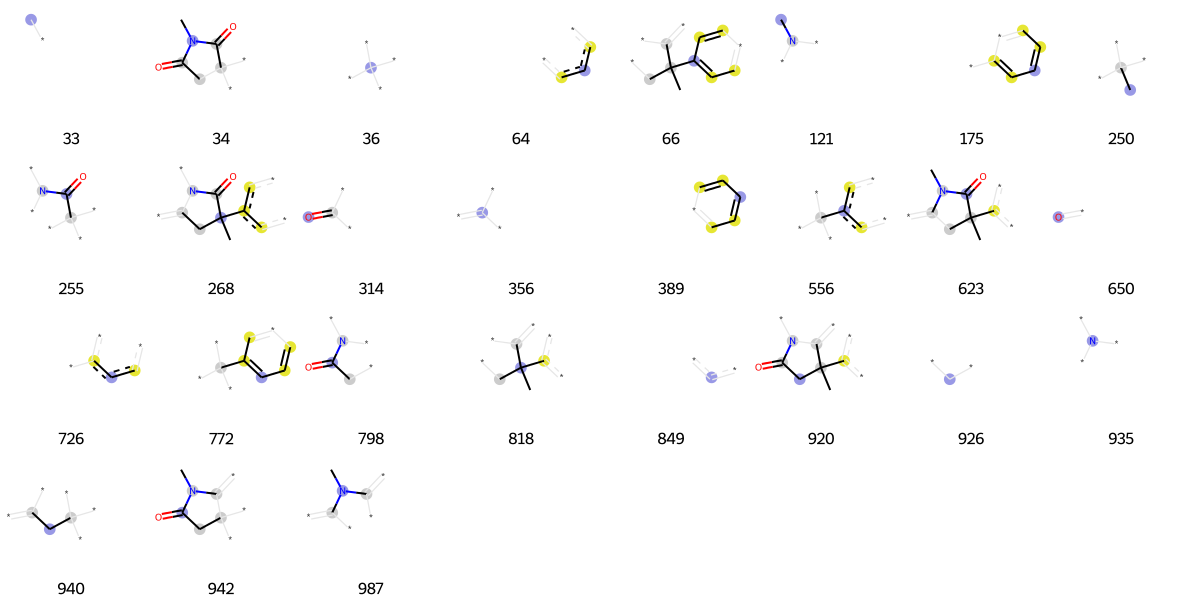

In [10092]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [10093]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[14,
 15,
 33,
 46,
 64,
 111,
 121,
 128,
 141,
 191,
 207,
 212,
 233,
 239,
 249,
 258,
 310,
 322,
 333,
 356,
 367,
 378,
 381,
 400,
 407,
 428,
 449,
 456,
 458,
 475,
 484,
 491,
 500,
 512,
 541,
 558,
 562,
 635,
 650,
 680,
 687,
 695,
 698,
 705,
 718,
 726,
 766,
 781,
 787,
 795,
 801,
 807,
 831,
 841,
 842,
 843,
 849,
 875,
 881,
 893,
 894,
 926,
 935,
 946,
 948,
 965,
 975,
 994]

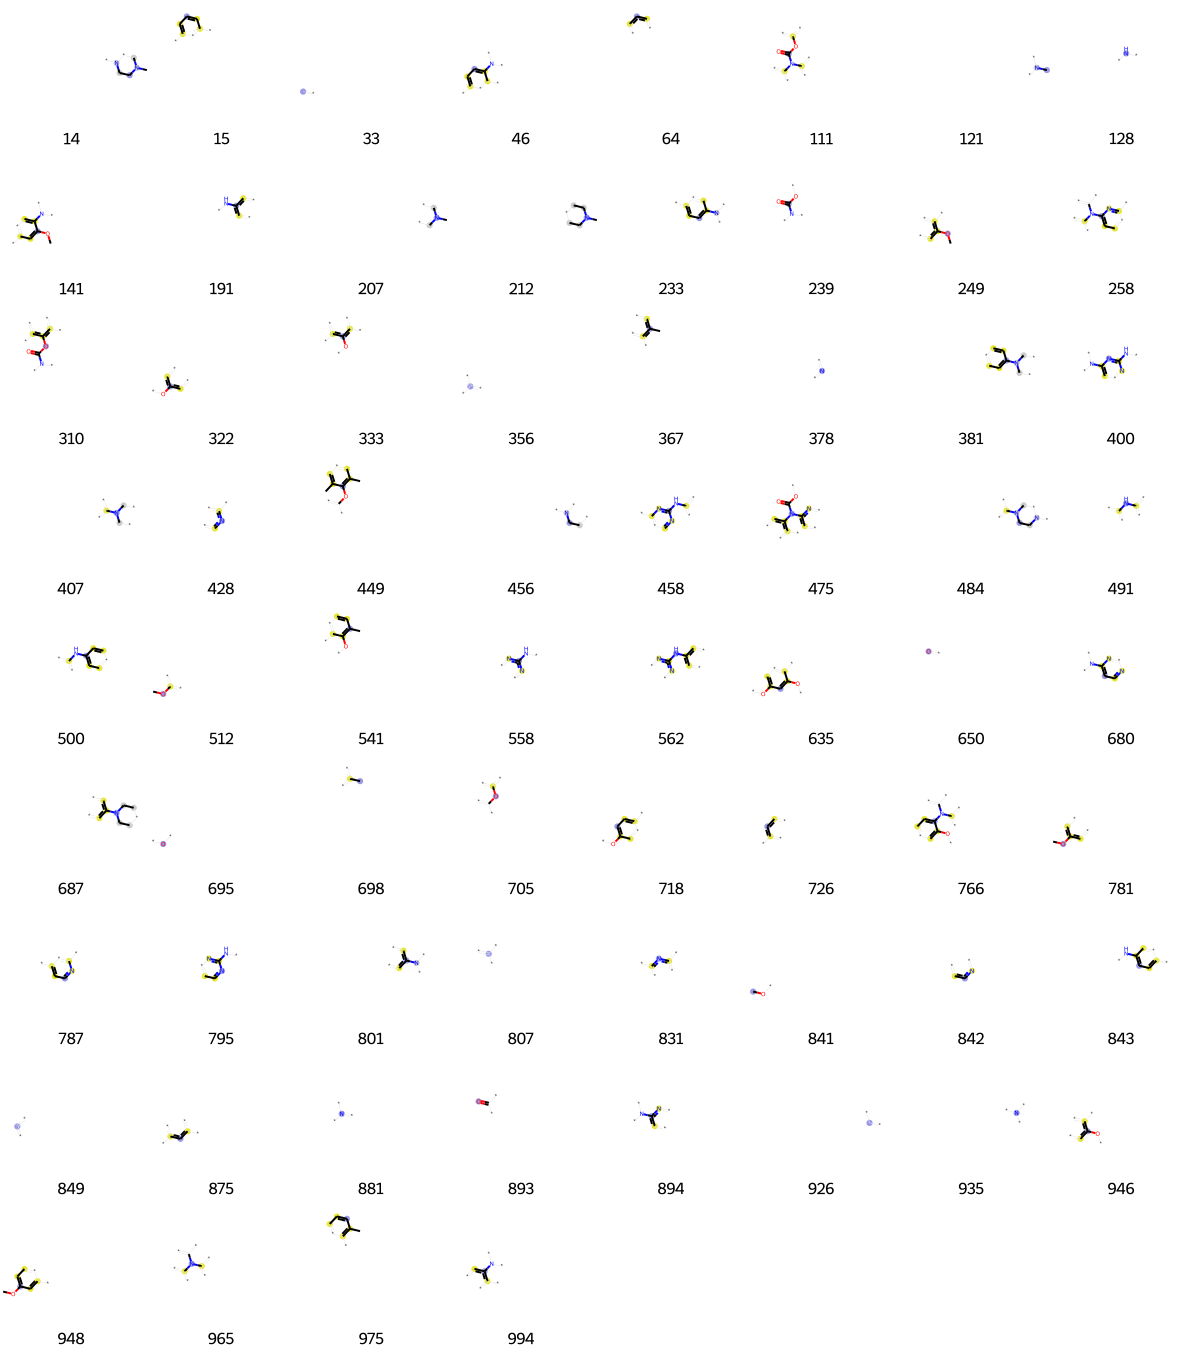

In [10094]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [10095]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[15,
 62,
 64,
 80,
 97,
 110,
 128,
 184,
 191,
 197,
 235,
 257,
 338,
 356,
 412,
 581,
 592,
 667,
 674,
 703,
 718,
 725,
 726,
 730,
 792,
 807,
 830,
 849,
 852,
 875,
 887,
 914,
 936,
 966,
 968]

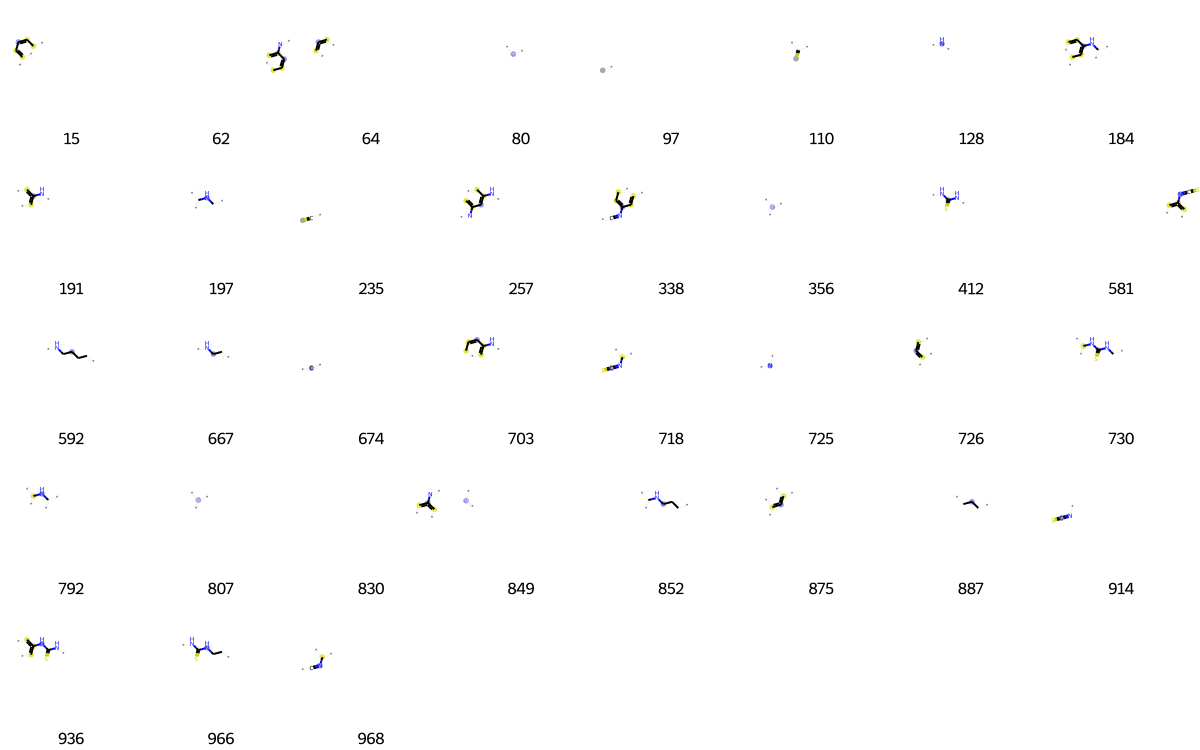

In [10096]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])